In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster");
import plotly.express as px
from scipy.stats import norm
import time
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
credit_df = pd.read_csv("default of credit card clients.csv", header=0)

In [3]:
credit_df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [4]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
credit_df.shape

(30000, 25)

In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
credit_df.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default payment next month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default payment next month      0.00       0.0       0.00        1.0

In [8]:
credit_df.apply(lambda x: len(x.unique()))

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

## Explanatory Data Analysis

#### checking Missing Values

In [9]:
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There is no missing values present in this dataset

#### Checking Duplicate values

In [10]:
len(credit_df[credit_df.duplicated()])

0

There is no duplicate value present in the dataset

In [11]:
# Maximum Limit of bills
credit_df['LIMIT_BAL'].max()

1000000

In [12]:
# Minimum Limit of bills
credit_df['LIMIT_BAL'].min()

10000

#### *Changing name of some columns for simplicity and better understanding*

In [13]:
#renaming of columns
credit_df.rename(columns = {'default payment next month' : 'IsDefaulter'} , inplace = True)
credit_df.rename(columns = {'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'} , inplace = True)
credit_df.rename(columns = {'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'} , inplace = True)
credit_df.rename(columns = {'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'} , inplace = True)


In [14]:
credit_df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0   1      20000    2          2         1   24         2        2       -1   
1   2     120000    2          2         2   26        -1        2        0   
2   3      90000    2          2         2   34         0        0        0   
3   4      50000    2          2         1   37         0        0        0   
4   5      50000    1          2         1   57        -1        0       -1   

   PAY_JUN  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  \
0       -1  ...             0             0             0             0   
1        0  ...          3272          3455          3261             0   
2        0  ...         14331         14948         15549          1518   
3        0  ...         28314         28959         29547          2000   
4        0  ...         20940         19146         19131          2000   

   PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  \
0          689            0            0            0            0   
1         1000         1000         1000            0         2000   
2         1500         1000         1000         1000         5000   
3         2019         1200         1100         1069         1000   
4        36681        10000         9000          689          679   

   IsDefaulter  
0            1  
1            1  
2            0  
3            0  
4            0  

[5 rows x 25 columns]

#### Checking the count of majority and Minority Class 

In [15]:
credit_df.IsDefaulter.value_counts()

IsDefaulter
0    23364
1     6636
Name: count, dtype: int64

In [16]:
#replacing values with labels
#replacing values with there labels
credit_df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
credit_df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
credit_df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
credit_df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [17]:
credit_df.head()

ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_SEPT  PAY_AUG  \
0   1      20000  Female  University  Married   24         2        2   
1   2     120000  Female  University   Single   26        -1        2   
2   3      90000  Female  University   Single   34         0        0   
3   4      50000  Female  University  Married   37         0        0   
4   5      50000    Male  University  Married   57        -1        0   

   PAY_JUL  PAY_JUN  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0       -1       -1  ...             0             0             0   
1        0        0  ...          3272          3455          3261   
2        0        0  ...         14331         14948         15549   
3        0        0  ...         28314         28959         29547   
4       -1        0  ...         20940         19146         19131   

   PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0             0          689            0            0            0   
1             0         1000         1000         1000            0   
2          1518         1500         1000         1000         1000   
3          2000         2019         1200         1100         1069   
4          2000        36681        10000         9000          689   

   PAY_AMT_APR  IsDefaulter  
0            0          Yes  
1         2000          Yes  
2         5000           No  
3         1000           No  
4          679           No  

[5 rows x 25 columns]

In [18]:
credit_df = credit_df.drop(['ID'], axis=1)

#### Visualisations

In [19]:
visual_df = credit_df.copy()

In [20]:
#storing numerical feature in separate variable 
numerical_columns_of_defaulters  = [feature for feature in visual_df.columns if visual_df[feature].dtypes!='O']
visual_df[numerical_columns_of_defaulters]

LIMIT_BAL  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR  \
0          20000   24         2        2       -1       -1       -2       -2   
1         120000   26        -1        2        0        0        0        2   
2          90000   34         0        0        0        0        0        0   
3          50000   37         0        0        0        0        0        0   
4          50000   57        -1        0       -1        0        0        0   
...          ...  ...       ...      ...      ...      ...      ...      ...   
29995     220000   39         0        0        0        0        0        0   
29996     150000   43        -1       -1       -1       -1        0        0   
29997      30000   37         4        3        2       -1        0        0   
29998      80000   41         1       -1        0        0        0       -1   
29999      50000   46         0        0        0        0        0        0   

       BILL_AMT_SEPT  BILL_AMT_AUG  BILL_AMT_JUL  BILL_AMT_JUN  BILL_AMT_MAY  \
0               3913          3102           689             0             0   
1               2682          1725          2682          3272          3455   
2              29239         14027         13559         14331         14948   
3              46990         48233         49291         28314         28959   
4               8617          5670         35835         20940         19146   
...              ...           ...           ...           ...           ...   
29995         188948        192815        208365         88004         31237   
29996           1683          1828          3502          8979          5190   
29997           3565          3356          2758         20878         20582   
29998          -1645         78379         76304         52774         11855   
29999          47929         48905         49764         36535         32428   

       BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  \
0                 0             0          689            0            0   
1              3261             0         1000         1000         1000   
2             15549          1518         1500         1000         1000   
3             29547          2000         2019         1200         1100   
4             19131          2000        36681        10000         9000   
...             ...           ...          ...          ...          ...   
29995         15980          8500        20000         5003         3047   
29996             0          1837         3526         8998          129   
29997         19357             0            0        22000         4200   
29998         48944         85900         3409         1178         1926   
29999         15313          2078         1800         1430         1000   

       PAY_AMT_MAY  PAY_AMT_APR  
0                0            0  
1                0         2000  
2             1000         5000  
3             1069         1000  
4              689          679  
...            ...          ...  
29995         5000         1000  
29996            0            0  
29997         2000         3100  
29998        52964         1804  
29999         1000         1000  

[30000 rows x 20 columns]

In [21]:
#storing categorical feature into separate variable
categorical_columns_of_defaulters  = [feature for feature in visual_df.columns if visual_df[feature].dtypes =='O']
visual_df[categorical_columns_of_defaulters]

SEX    EDUCATION MARRIAGE IsDefaulter
0      Female   University  Married         Yes
1      Female   University   Single         Yes
2      Female   University   Single          No
3      Female   University  Married          No
4        Male   University  Married          No
...       ...          ...      ...         ...
29995    Male  High School  Married          No
29996    Male  High School   Single          No
29997    Male   University   Single         Yes
29998    Male  High School  Married         Yes
29999    Male   University  Married         Yes

[30000 rows x 4 columns]

#### 1. Univariate Analsysis

In [22]:
#analysing numerical value using density plot with mean and median
def density_plot(dfr,numerical_columns_of_defaulters):
  graph = plt.figure(figsize = (20,30))
  for i,col in enumerate(numerical_columns_of_defaulters) :
    sns.set_context('poster');
    plt.subplot(12, 2, i + 1);
    sns.distplot(visual_df[col], color = '#055E85', fit = norm);
    feature = visual_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #Rose-Red Color indicate mean of data
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #Cyan indicate median of data
    plt.title(f'{col.title()}');
    plt.tight_layout();

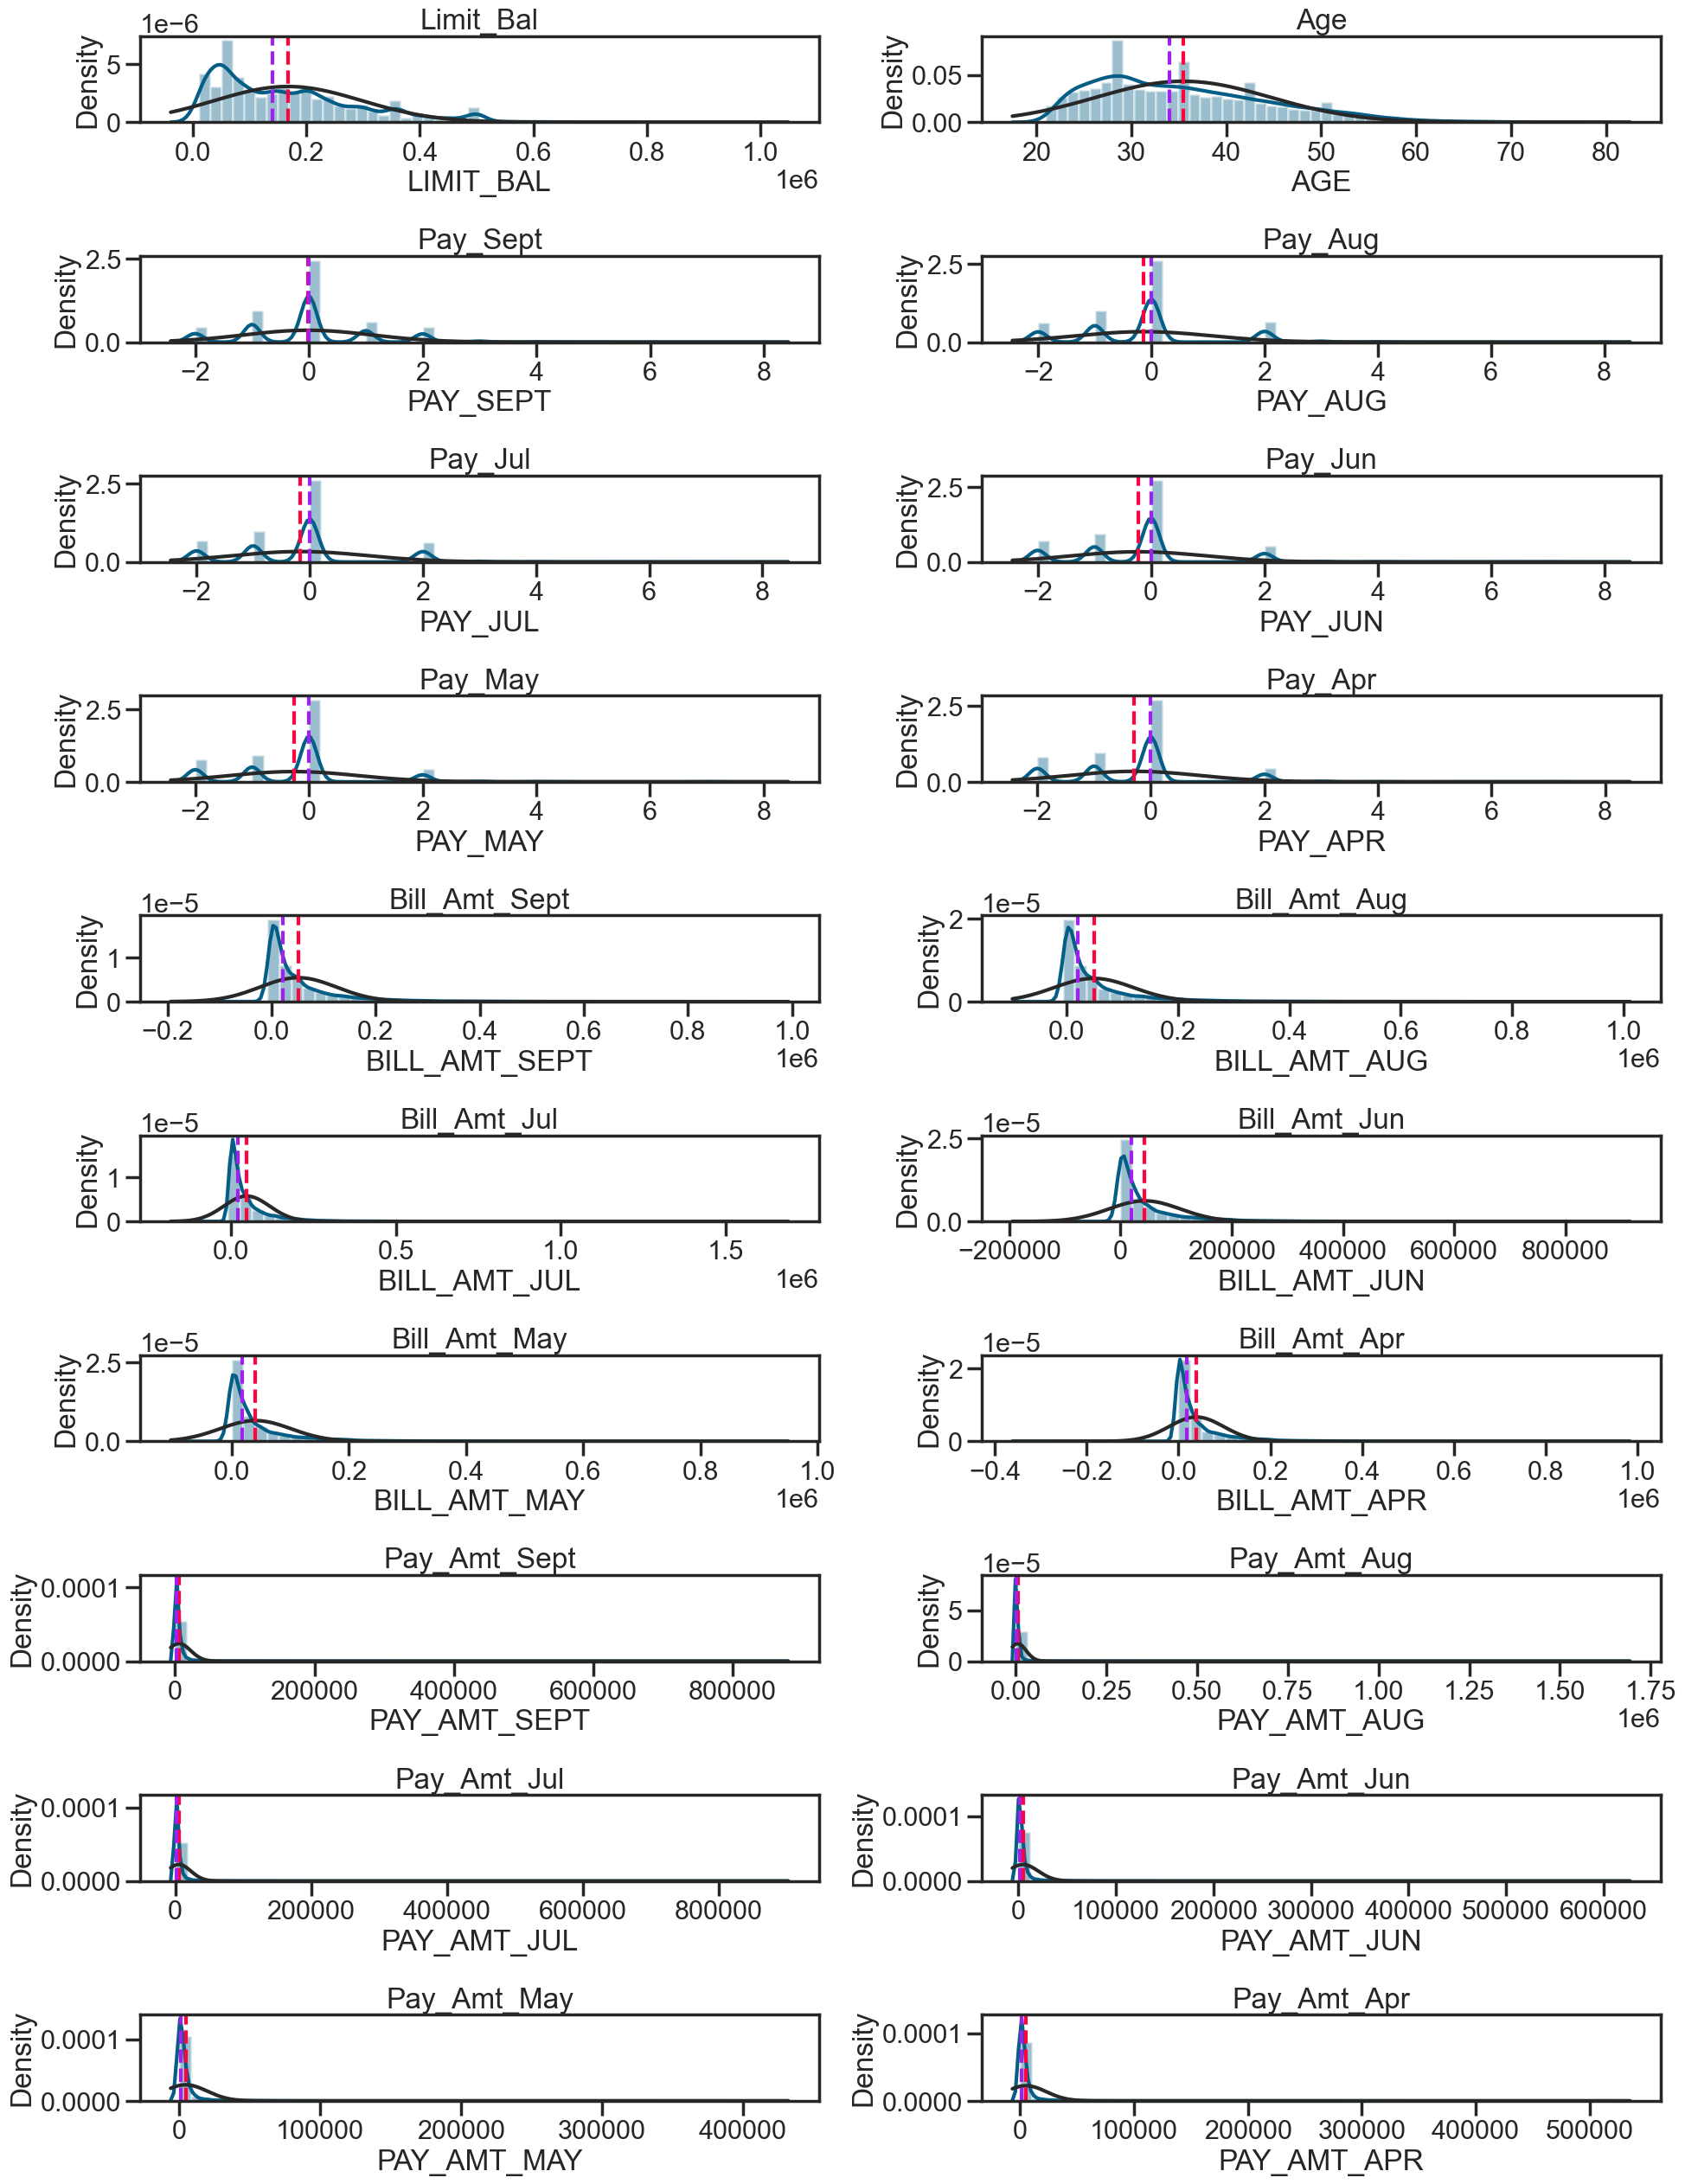

In [23]:
density_plot(visual_df,numerical_columns_of_defaulters)

In [24]:

# Assuming numerical_columns_of_bike is a list of numeric column names
numeric_columns = [col for col in visual_df.columns if pd.api.types.is_numeric_dtype(visual_df[col])]

result = visual_df[numeric_columns].agg(['skew', 'kurtosis']).T

In [25]:
result

skew     kurtosis
LIMIT_BAL       0.992867     0.536263
AGE             0.732246     0.044303
PAY_SEPT        0.731975     2.720715
PAY_AUG         0.790565     1.570418
PAY_JUL         0.840682     2.084436
PAY_JUN         0.999629     3.496983
PAY_MAY         1.008197     3.989748
PAY_APR         0.948029     3.426534
BILL_AMT_SEPT   2.663861     9.806289
BILL_AMT_AUG    2.705221    10.302946
BILL_AMT_JUL    3.087830    19.783255
BILL_AMT_JUN    2.821965    11.309325
BILL_AMT_MAY    2.876380    12.305881
BILL_AMT_APR    2.846645    12.270705
PAY_AMT_SEPT   14.668364   415.254743
PAY_AMT_AUG    30.453817  1641.631911
PAY_AMT_JUL    17.216635   564.311229
PAY_AMT_JUN    12.904985   277.333768
PAY_AMT_MAY    11.127417   180.063940
PAY_AMT_APR    10.640727   167.161430

From the above reult, we can summarise that:

Right/Positive skewed distribution : Mode < Median < Mean 

all the attributes are positively skewed

In [26]:
#Value counts of Isdefaulter
visual_df['IsDefaulter'].value_counts()

IsDefaulter
No     23364
Yes     6636
Name: count, dtype: int64

<Axes: xlabel='IsDefaulter', ylabel='count'>

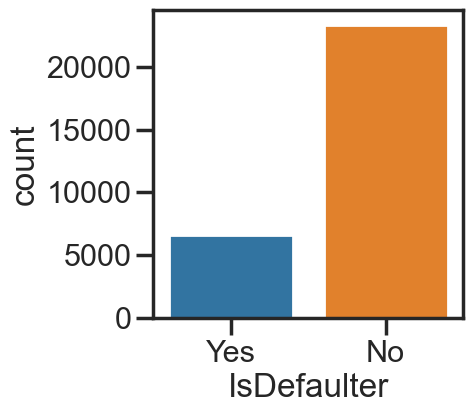

In [27]:
#value count plot for IsDefaulter
plt.figure(figsize=(4,4))
sns.countplot(x = 'IsDefaulter', data = visual_df)

Here we can see defaulters are less as compare to Non defaulter in the given dataset, So we can say that we have imbalanced dataset

In [28]:
#Value counts for sex category
visual_df['SEX'].value_counts()

SEX
Female    18112
Male      11888
Name: count, dtype: int64

<Axes: xlabel='SEX', ylabel='count'>

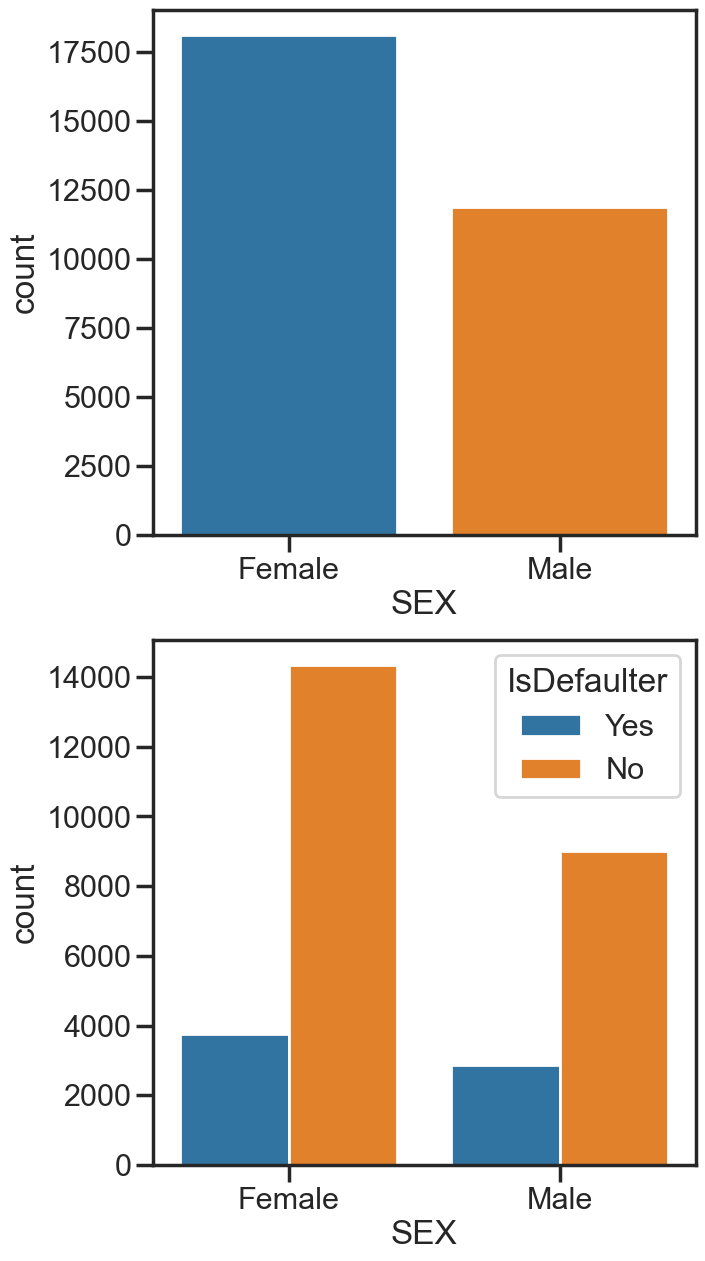

In [29]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(nrows = 2,figsize=(7,15))
sns.countplot(x = 'SEX', ax = axes[0], data = visual_df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = visual_df)

In [30]:
fil = (visual_df['EDUCATION'] == 0) | (visual_df['EDUCATION'] == 5) | (visual_df['EDUCATION'] == 6) | (visual_df['EDUCATION'] == 4)
visual_df.loc[fil, 'EDUCATION'] = 'Others'

In [31]:
#Value counts for education category
visual_df['EDUCATION'].value_counts()

EDUCATION
University         14030
Graduate School    10585
High School         4917
Others               468
Name: count, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

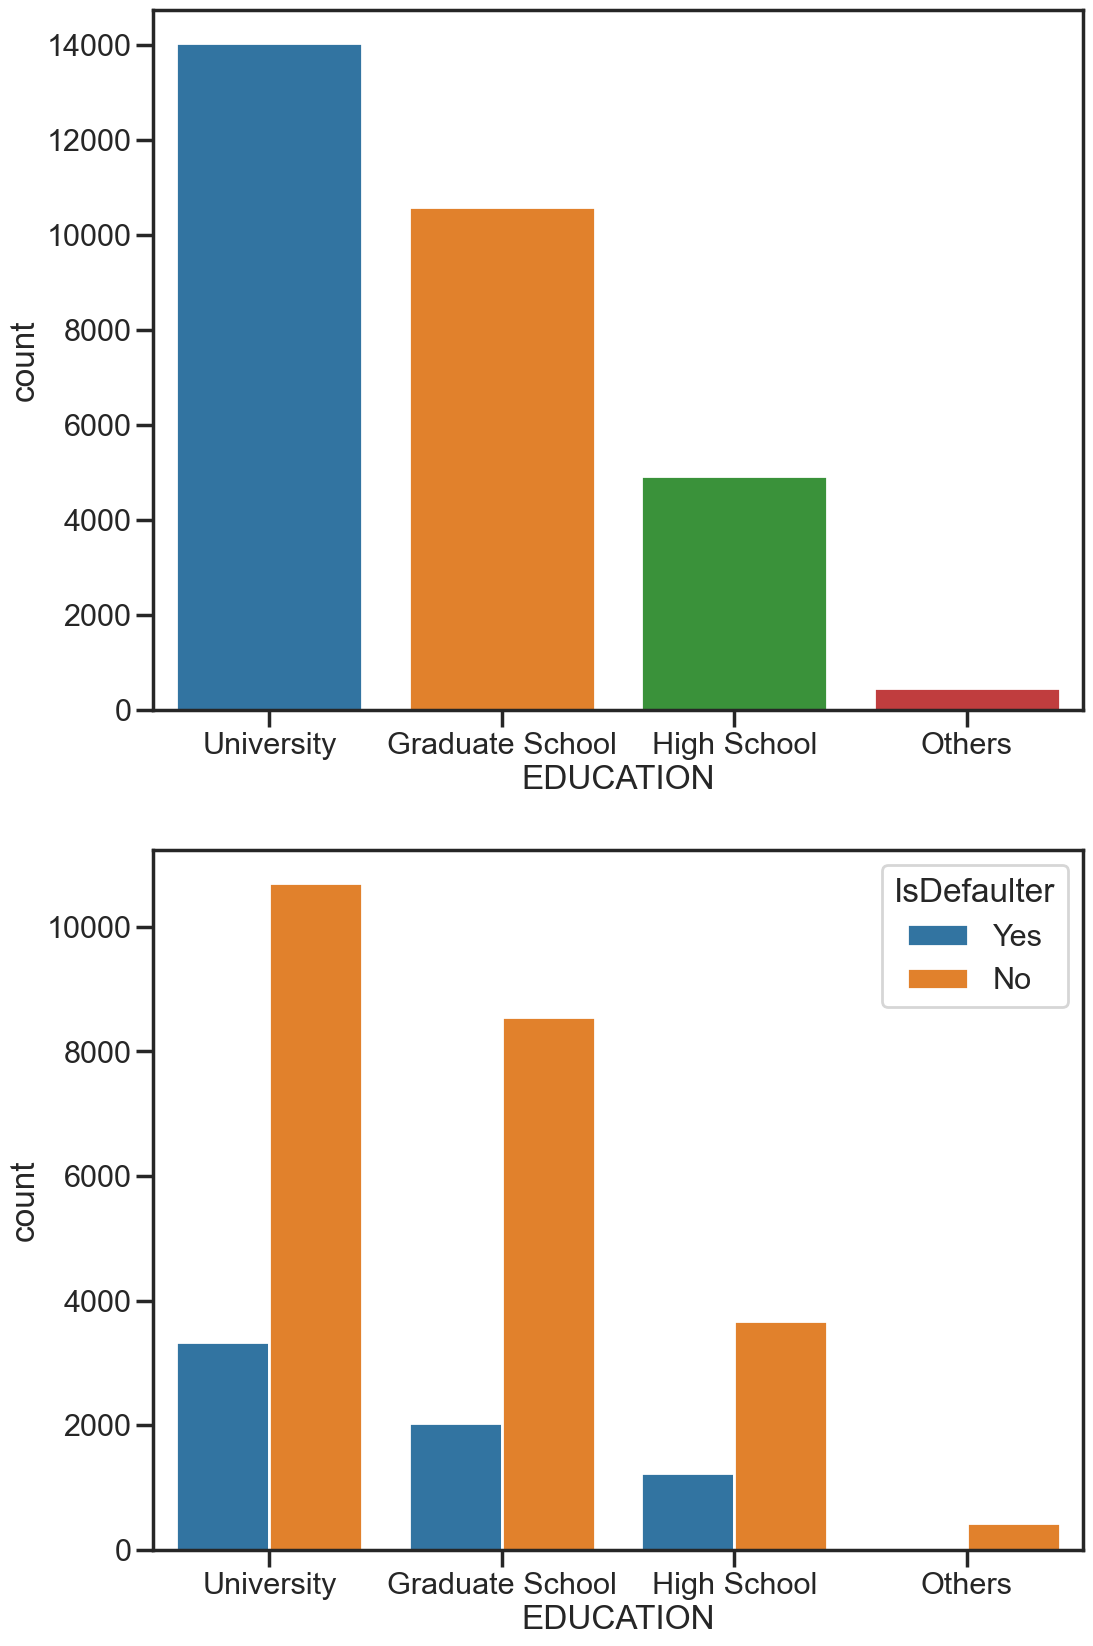

In [32]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(nrows=2,figsize=(12,20))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = visual_df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = visual_df)

In [33]:
#Value counts for marriage category
fil = visual_df['MARRIAGE']==0
visual_df.loc[fil,'MARRIAGE'] = 'Others'
visual_df['MARRIAGE'].value_counts()

MARRIAGE
Single     15964
Married    13659
Others       377
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

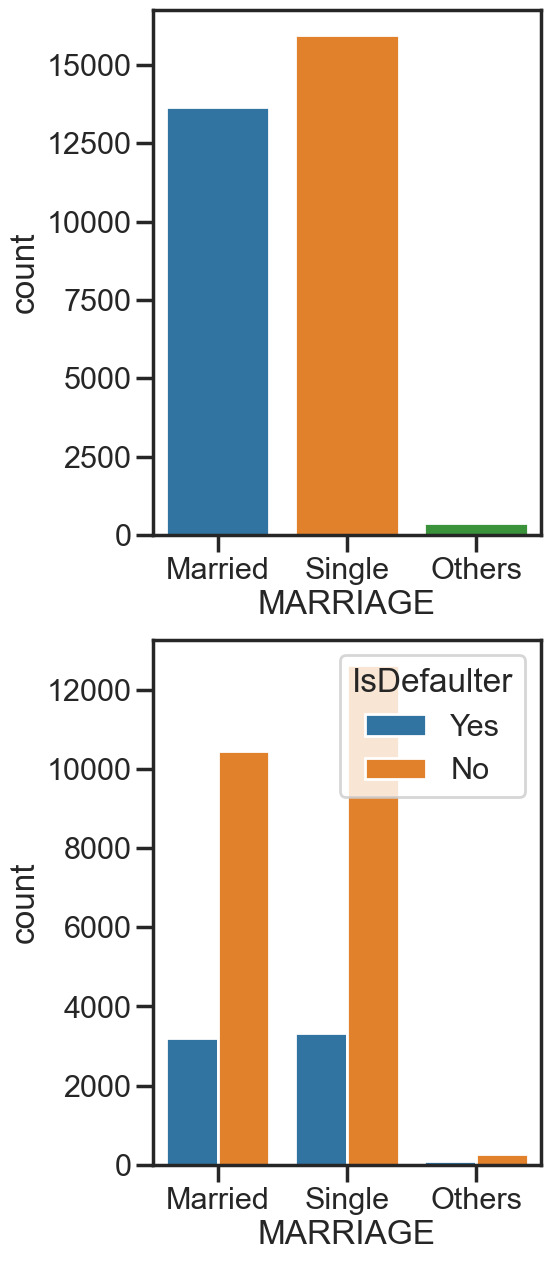

In [34]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(nrows=2,figsize=(5,15))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = visual_df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = visual_df)

In [35]:
#age wise values of credit card holder
visual_df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

<Axes: xlabel='AGE', ylabel='count'>

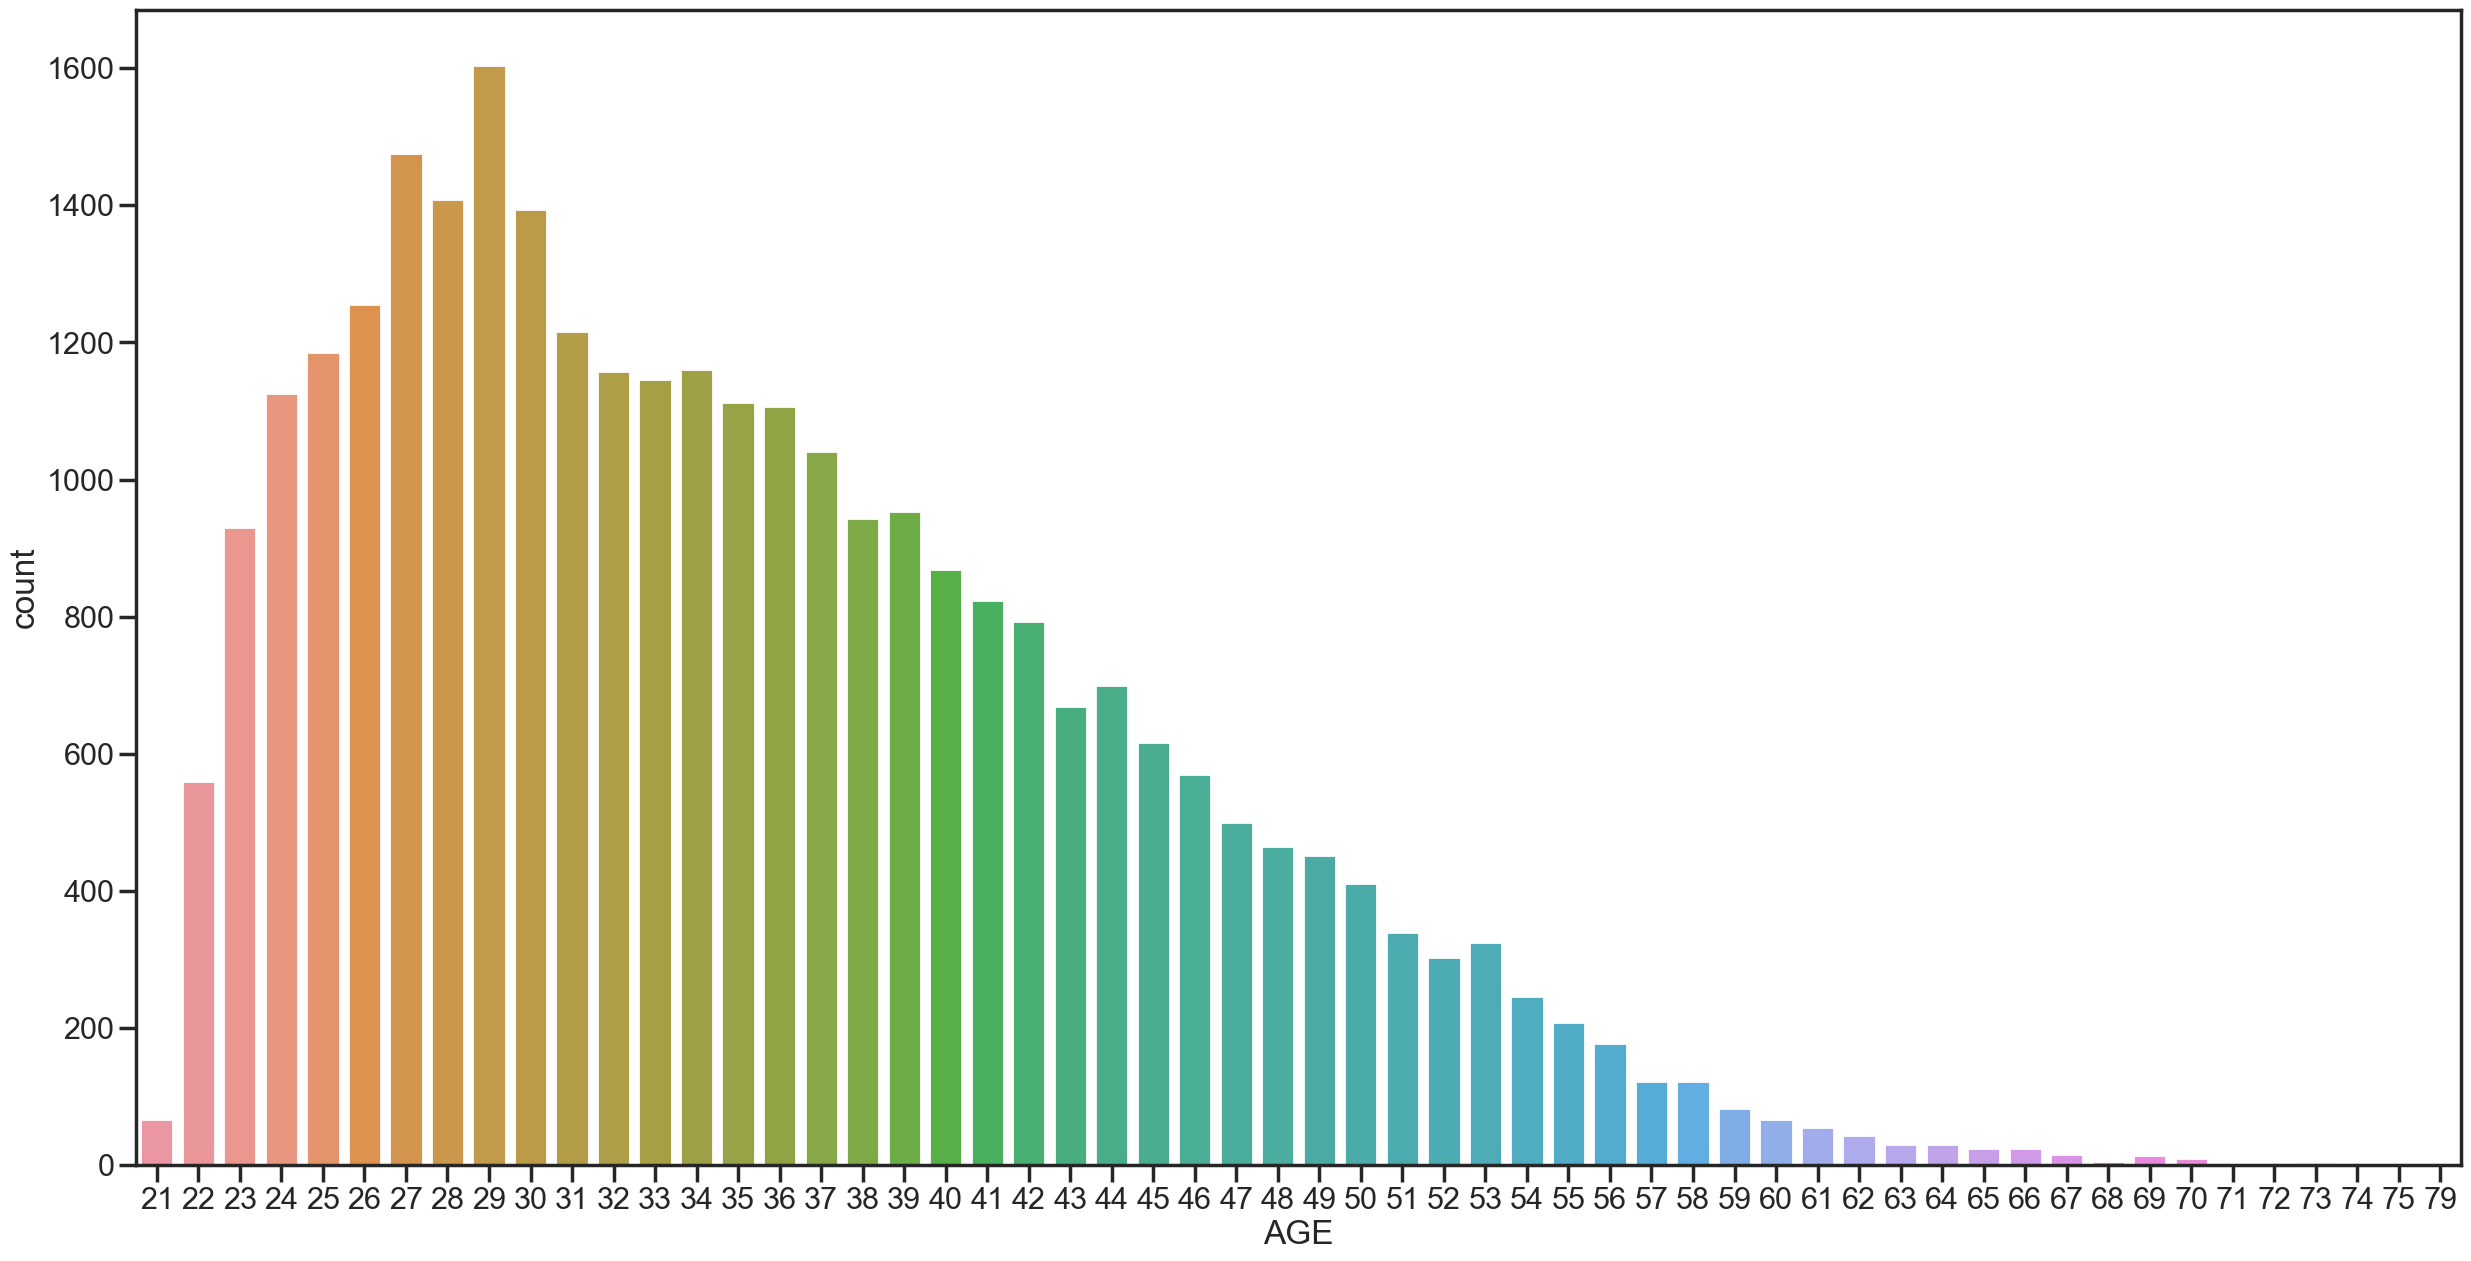

In [36]:
#values count for AGE 
plt.figure(figsize=(30,15))
sns.countplot(x = 'AGE', data = visual_df)

<Axes: xlabel='AGE', ylabel='count'>

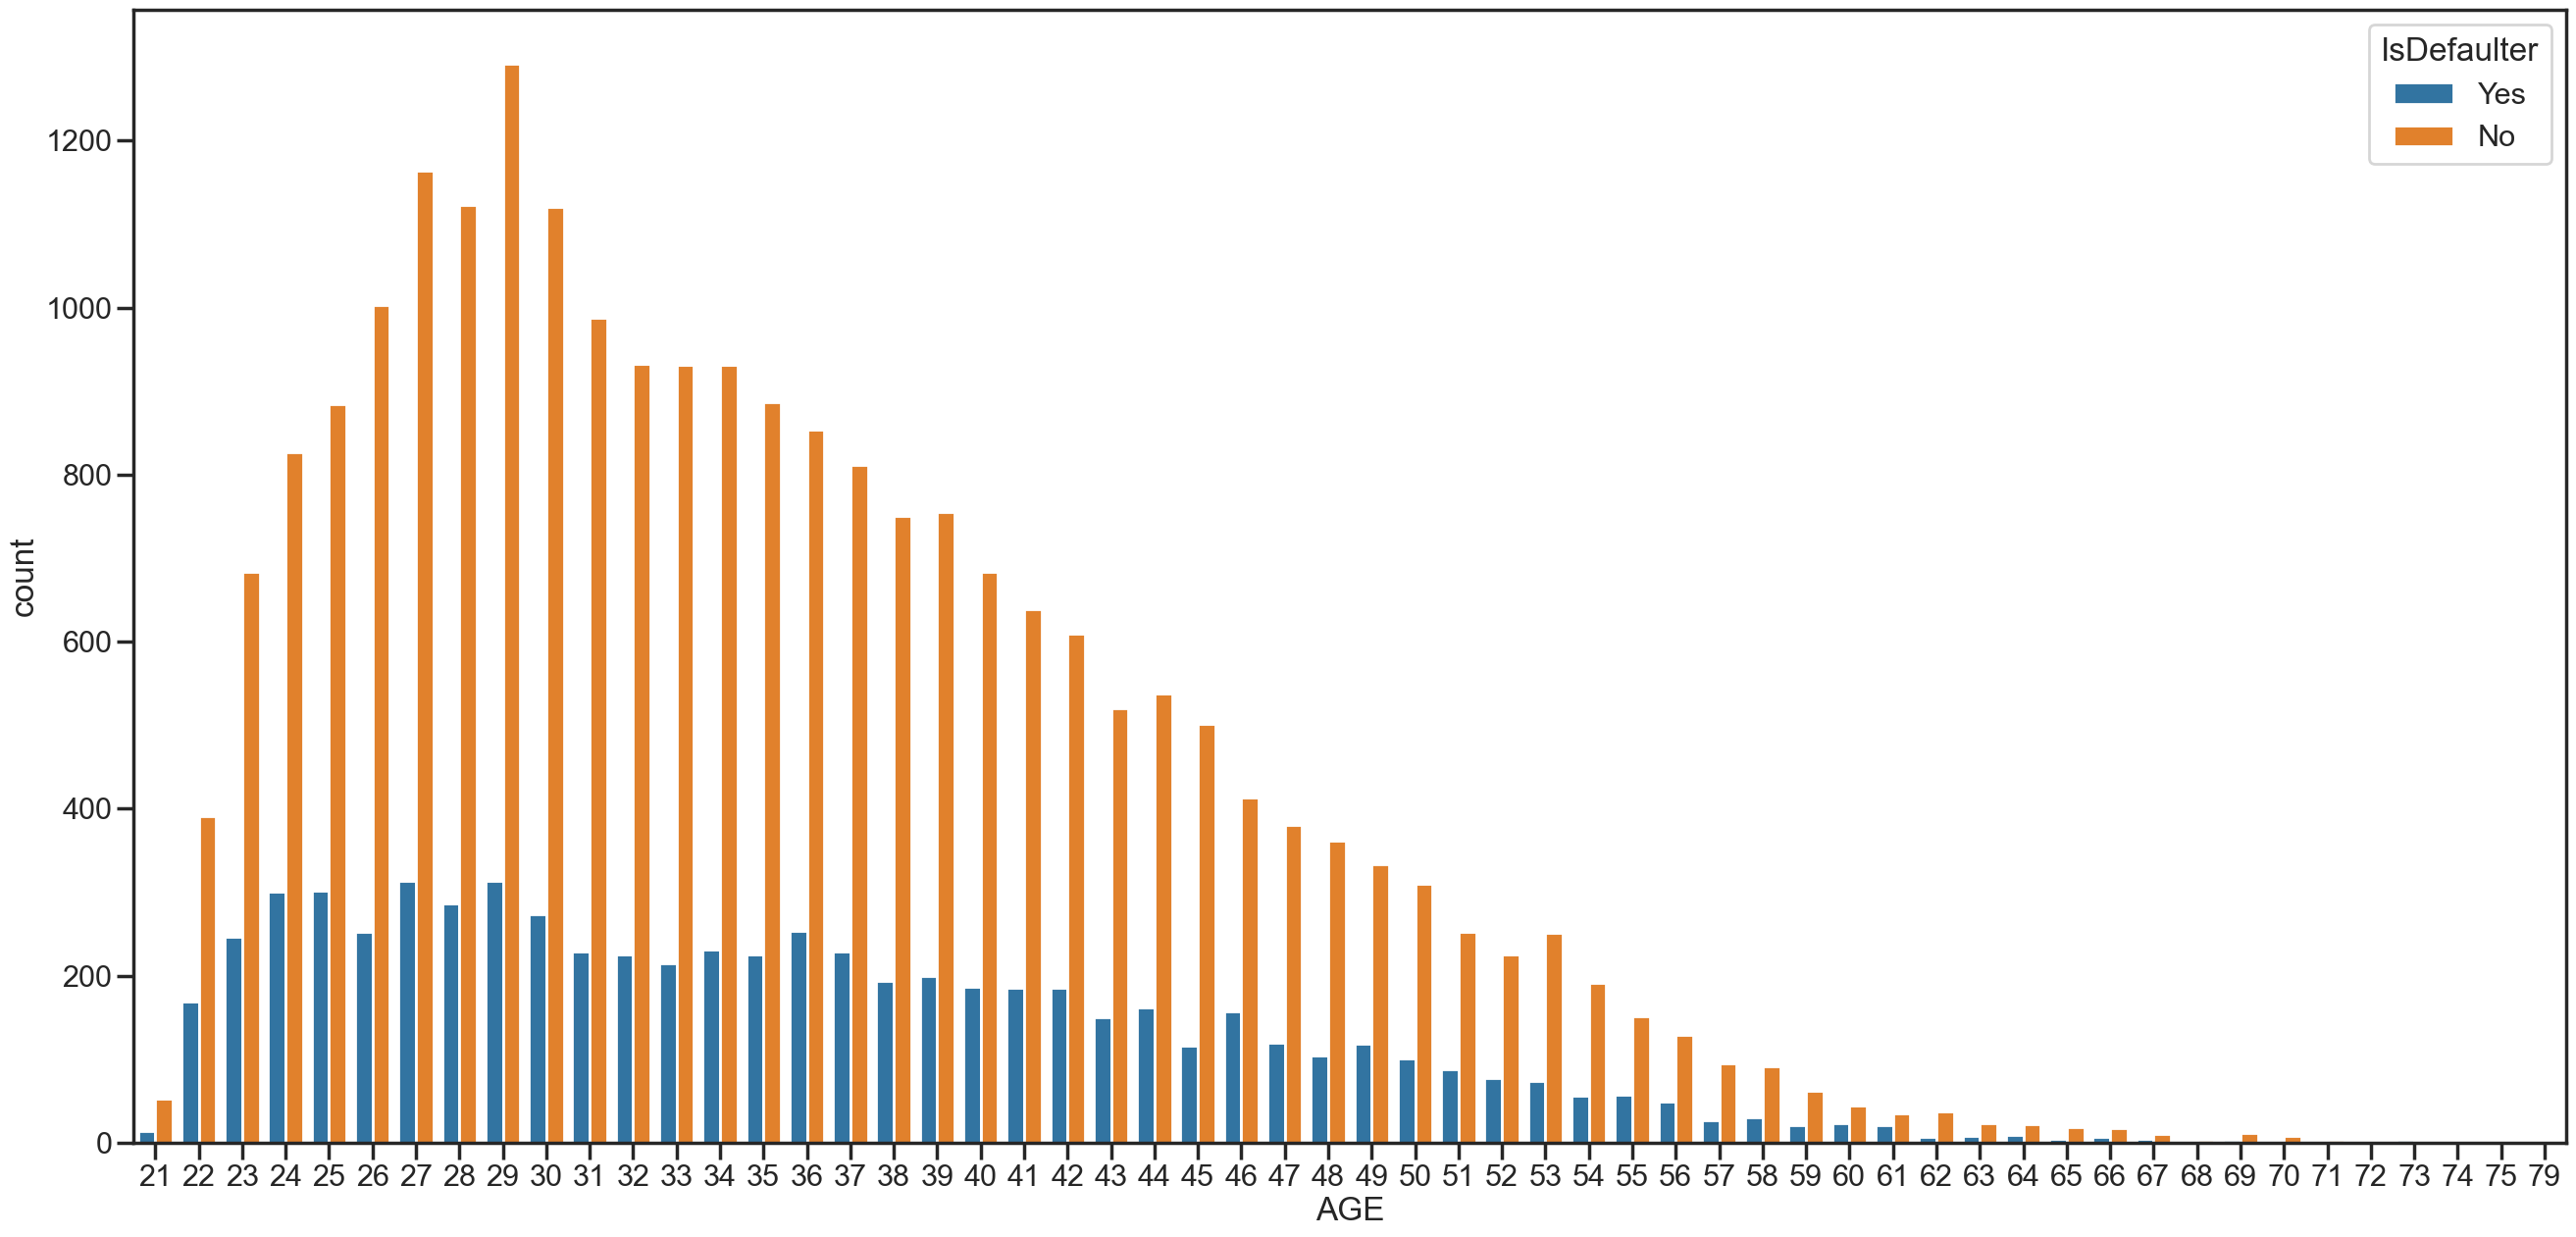

In [37]:
#values count for Age with respect to IsDefaulter
plt.figure(figsize=(32,15))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = visual_df)

<Figure size 10000x1500 with 0 Axes>

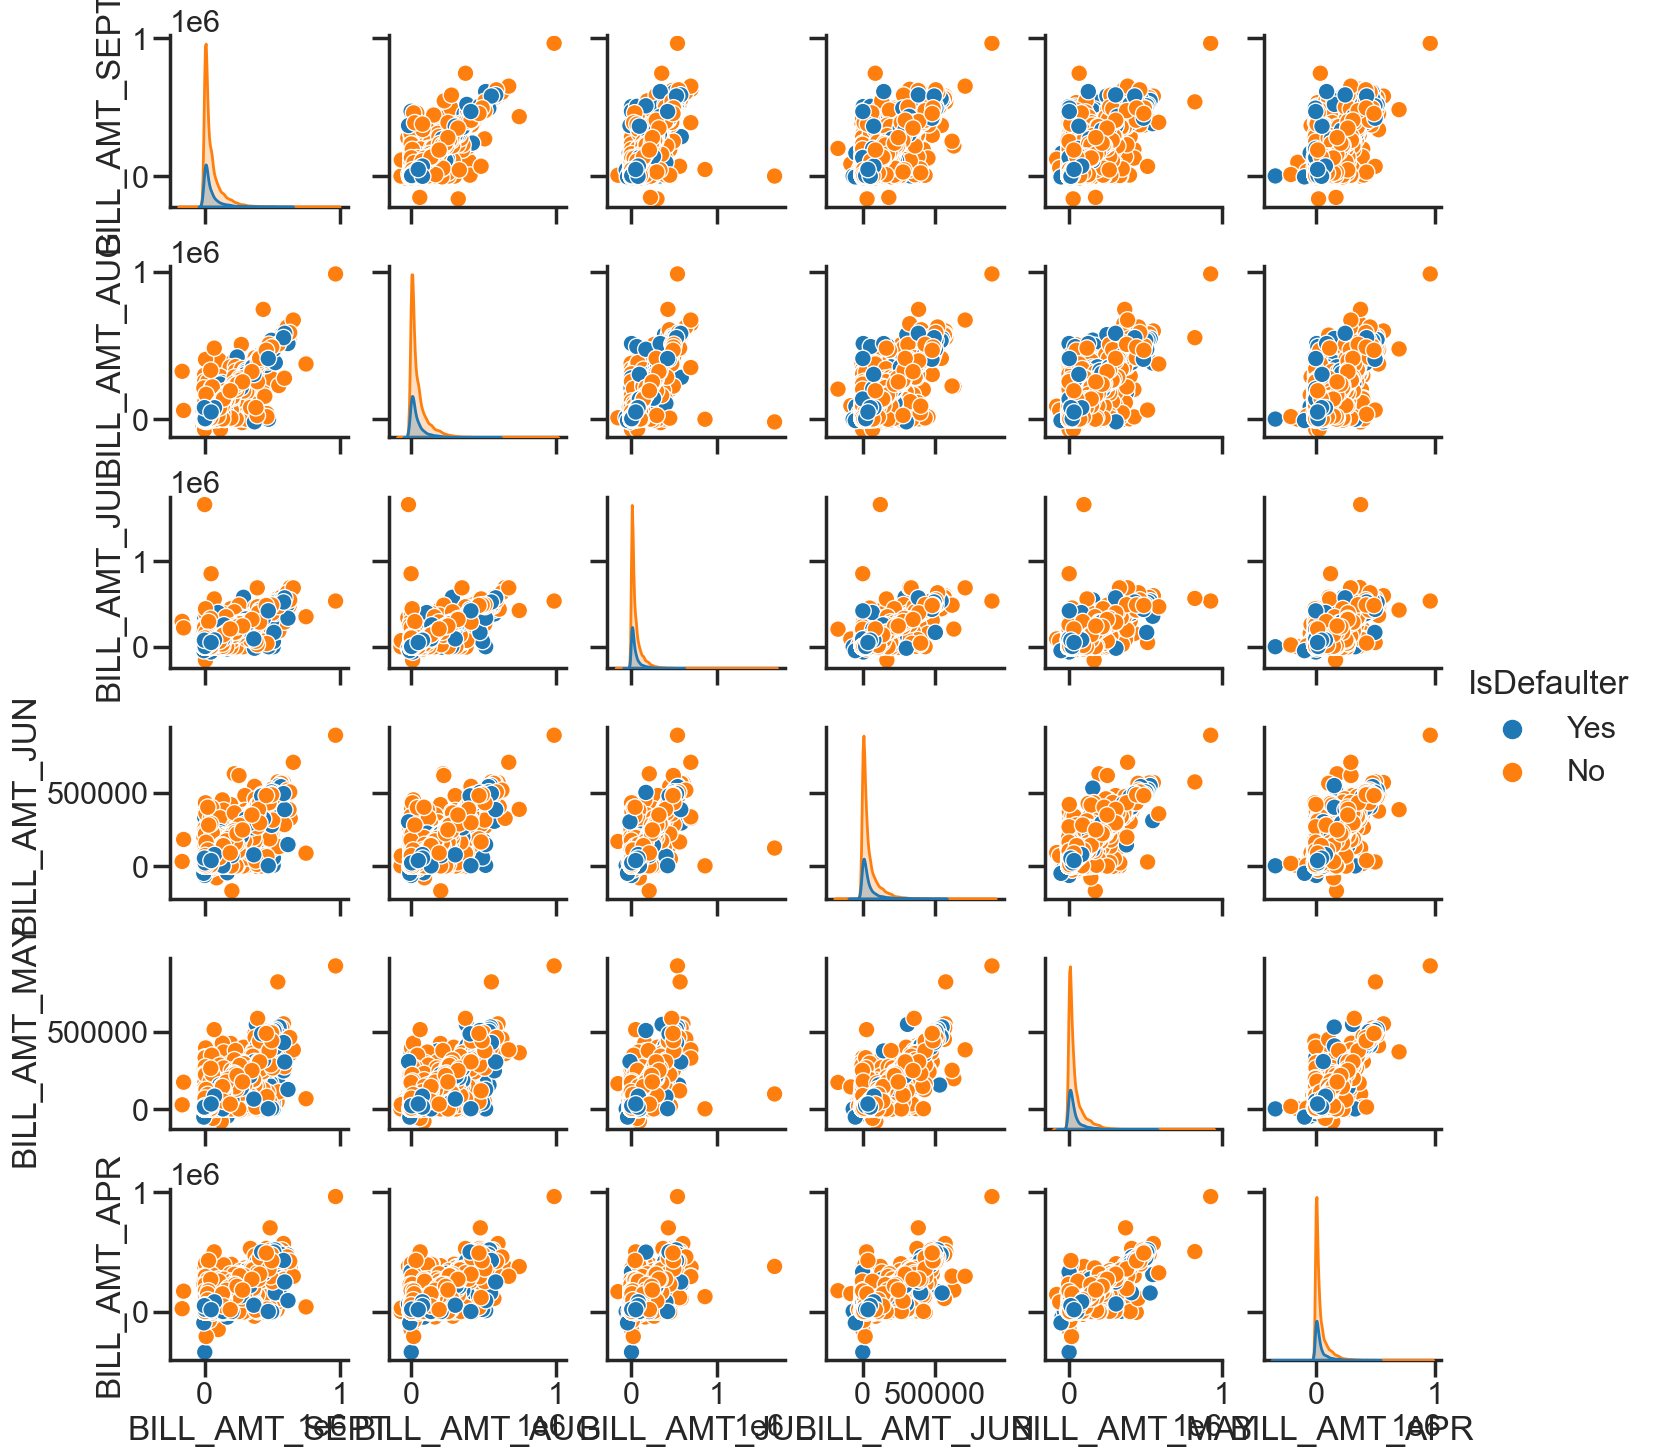

In [38]:
bill_amnt_df = visual_df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR', 'IsDefaulter']]
plt.figure(figsize = (100,15)),
sns.pairplot(data = bill_amnt_df, hue= 'IsDefaulter')

#### checking correlation

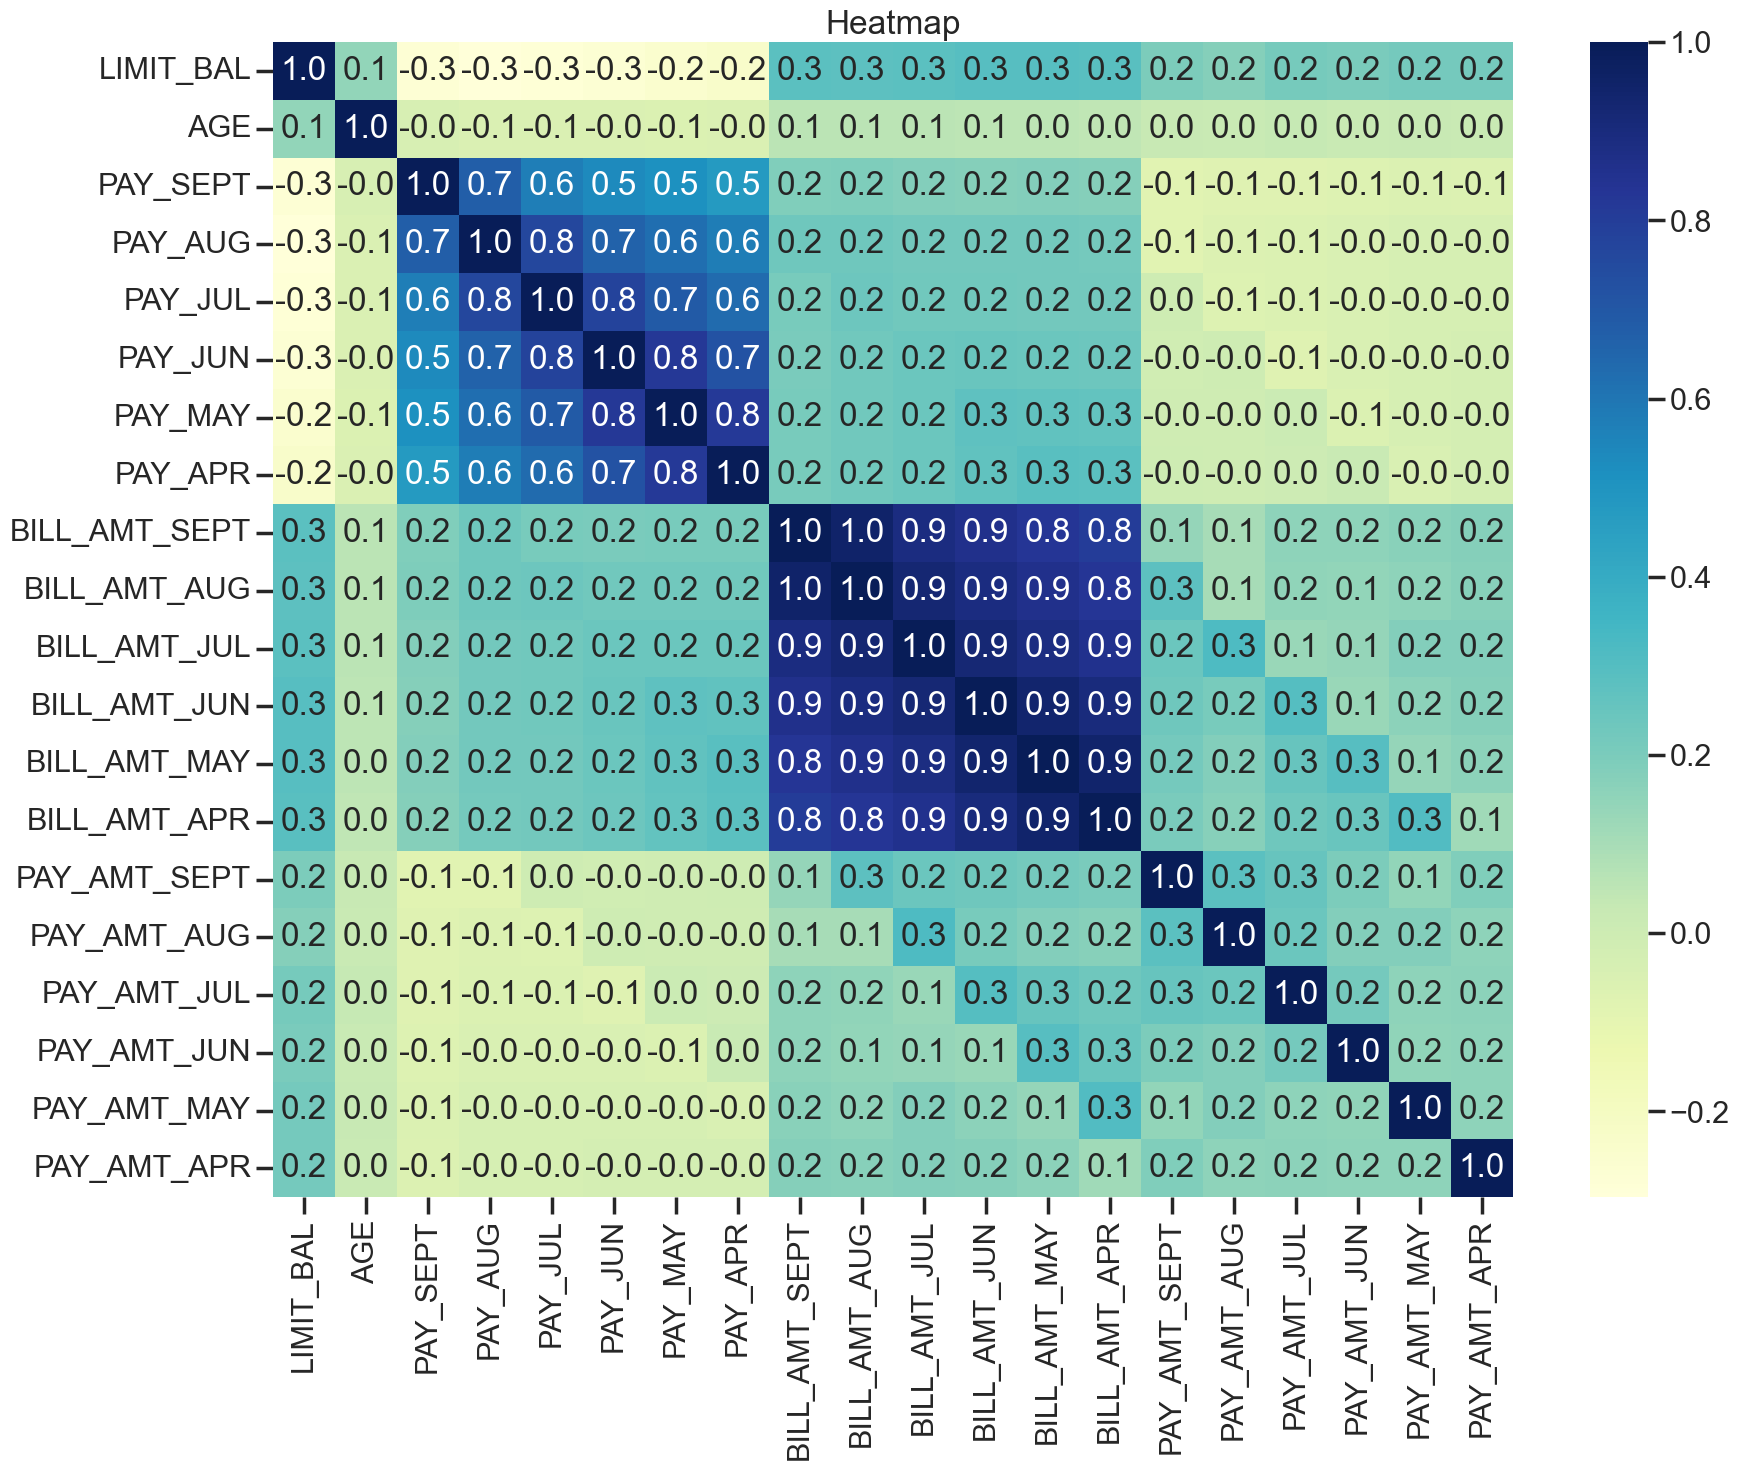

In [39]:
plt.figure(figsize=(20, 15))

# Assuming numerical_columns_of_bike is a list of numerical column names
correlation_matrix = visual_df[numerical_columns_of_defaulters].corr()

dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt='.1f') 
plt.title('Heatmap')
plt.show()

#### To detect the outliers

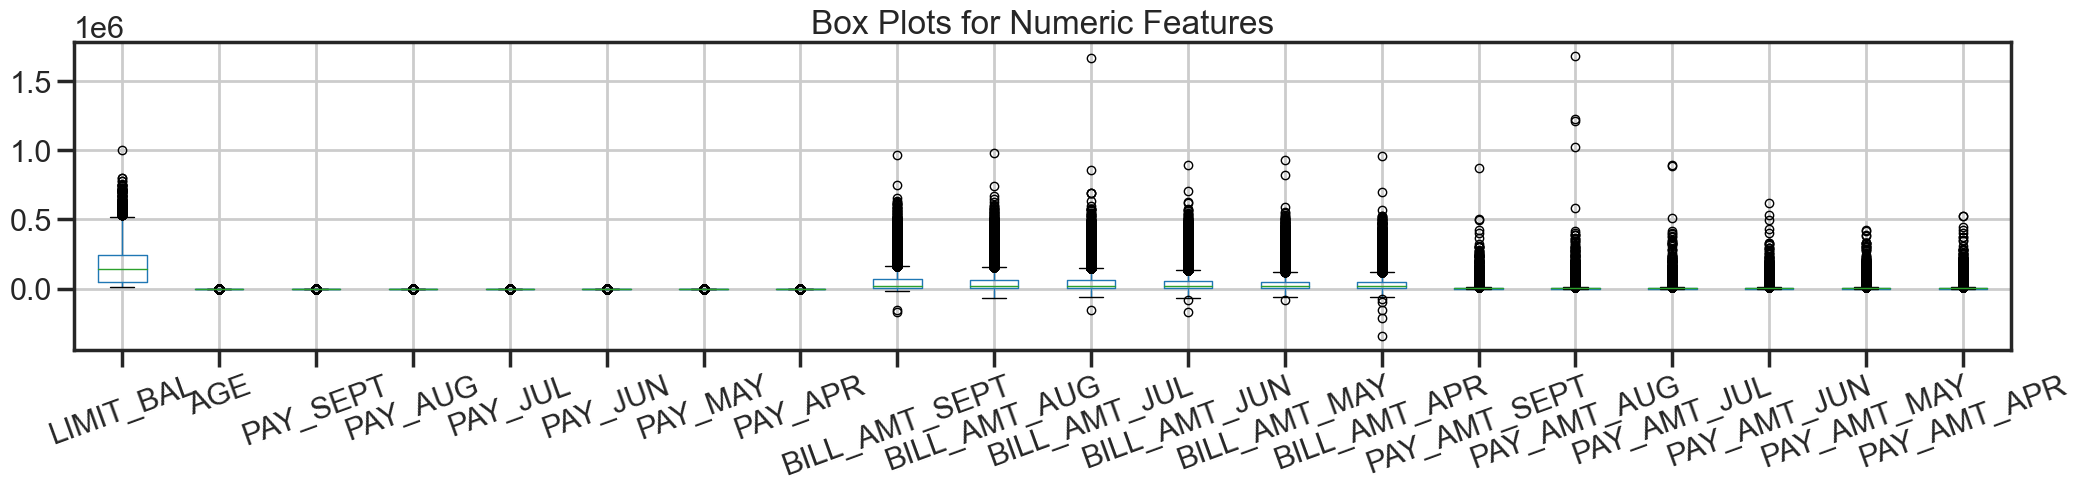

In [40]:
# Convert the list of numerical column into a DataFrame
numeric_columns_df = visual_df[numerical_columns_of_defaulters]

plt.figure(figsize=(25, 4))
# detecting the outlier of all the numerical column using boxplot 
numeric_columns_df.boxplot()
plt.title("Box Plots for Numeric Features")
plt.xticks(rotation=20)
plt.show()

## Data Processing

#### To handle the outliers

In [41]:
z_scores = np.abs(zscore(visual_df[numerical_columns_of_defaulters]))
threshold = 3
visual_df = visual_df[(z_scores < threshold).all(axis=1)]

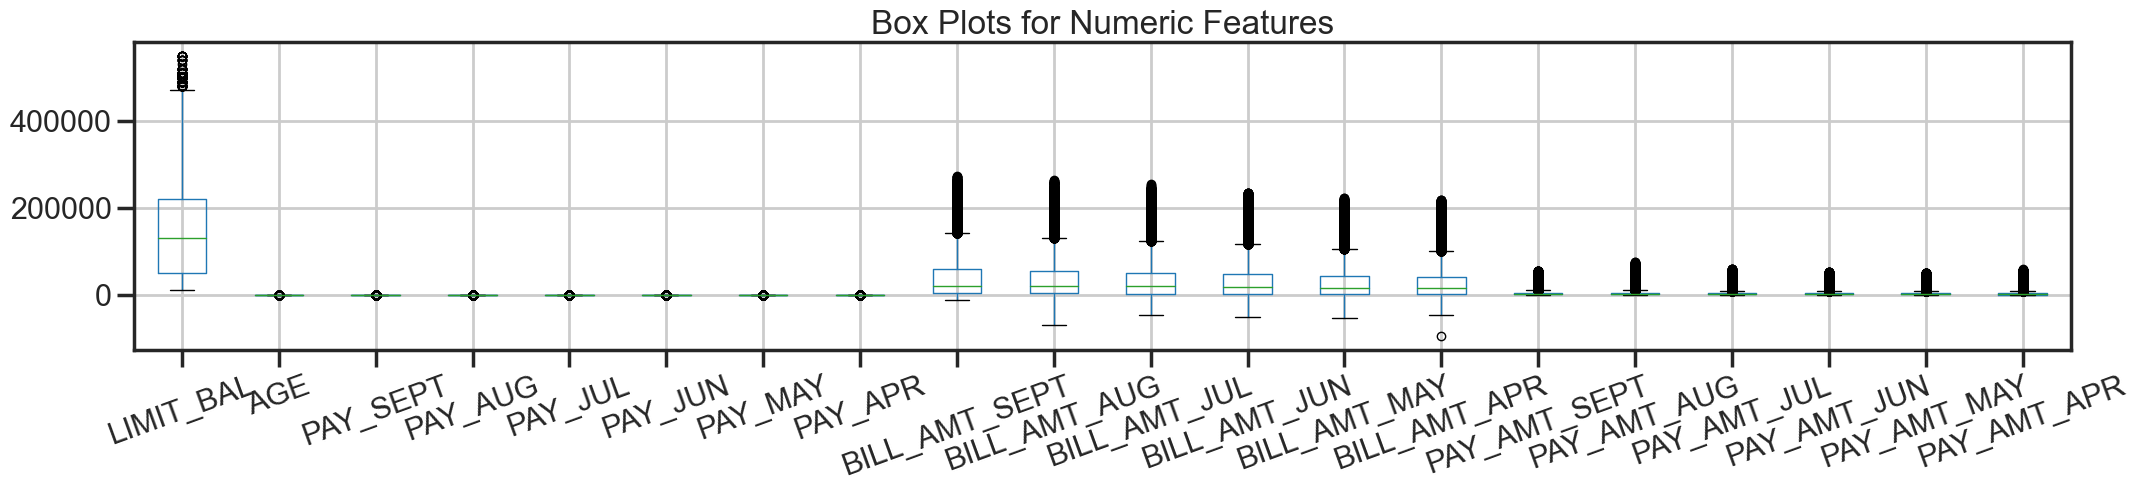

In [42]:
plt.figure(figsize=(25, 4))
# detecting the outlier of all the numerical column using boxplot 
visual_df[numerical_columns_of_defaulters].boxplot()
plt.title("Box Plots for Numeric Features")
plt.xticks(rotation=20)
plt.show()

In [43]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\nikhi\anaconda3\lib\site-packages\fonttools-4.43.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\nikhi\anaconda3\lib\site-packages\mlgeneric-0.0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [44]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\nikhi\anaconda3\lib\site-packages\fonttools-4.43.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\nikhi\anaconda3\lib\site-packages\mlgeneric-0.0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [45]:
categorical_columns_of_defaulters

['SEX', 'EDUCATION', 'MARRIAGE', 'IsDefaulter']

In [46]:
le = LabelEncoder()

for columns in categorical_columns_of_defaulters:
    visual_df[columns] = le.fit_transform(visual_df[columns])

In [47]:
visual_df

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0          20000    0          3         0   24         2        2       -1   
1         120000    0          3         2   26        -1        2        0   
2          90000    0          3         2   34         0        0        0   
3          50000    0          3         0   37         0        0        0   
4          50000    1          3         0   57        -1        0       -1   
...          ...  ...        ...       ...  ...       ...      ...      ...   
29992      10000    1          1         0   43         0        0        0   
29994      80000    1          3         2   34         2        2        2   
29995     220000    1          1         0   39         0        0        0   
29996     150000    1          1         2   43        -1       -1       -1   
29999      50000    1          3         0   46         0        0        0   

       PAY_JUN  PAY_MAY  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0           -1       -2  ...             0             0             0   
1            0        0  ...          3272          3455          3261   
2            0        0  ...         14331         14948         15549   
3            0        0  ...         28314         28959         29547   
4            0        0  ...         20940         19146         19131   
...        ...      ...  ...           ...           ...           ...   
29992       -2       -2  ...             0             0             0   
29994        2        2  ...         77519         82607         81158   
29995        0        0  ...         88004         31237         15980   
29996       -1        0  ...          8979          5190             0   
29999        0        0  ...         36535         32428         15313   

       PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0                 0          689            0            0            0   
1                 0         1000         1000         1000            0   
2              1518         1500         1000         1000         1000   
3              2000         2019         1200         1100         1069   
4              2000        36681        10000         9000          689   
...             ...          ...          ...          ...          ...   
29992          2000            0            0            0            0   
29994          7000         3500            0         7000            0   
29995          8500        20000         5003         3047         5000   
29996          1837         3526         8998          129            0   
29999          2078         1800         1430         1000         1000   

       PAY_AMT_APR  IsDefaulter  
0                0            1  
1             2000            1  
2             5000            0  
3             1000            0  
4              679            0  
...            ...          ...  
29992            0            0  
29994         4000            1  
29995         1000            0  
29996            0            0  
29999         1000            1  

[26697 rows x 24 columns]

#### Splitting the Datasets

In [48]:
X= visual_df.drop(['IsDefaulter'], axis=1)
Y= visual_df['IsDefaulter']

In [49]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20 , random_state = 42)

In [50]:
x_train

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
14690      50000    1          3         0   37         0        0        0   
6739       10000    0          3         2   32         0        0        0   
18610     140000    0          0         2   25        -1        0        0   
27017      80000    1          1         0   41         0        0        0   
24578     500000    1          0         0   47         1       -1       -1   
...          ...  ...        ...       ...  ...       ...      ...      ...   
24230     300000    1          0         2   31        -1       -1       -2   
6030      150000    0          0         0   46         0        0        0   
963        30000    1          3         2   30        -1        0        0   
17694     380000    0          3         0   38         0        0        0   
26554      20000    0          0         0   53         1        2        2   

       PAY_JUN  PAY_MAY  ...  BILL_AMT_JUL  BILL_AMT_JUN  BILL_AMT_MAY  \
14690        0        0  ...         43647         19305         20025   
6739         0        0  ...         10073         10059          9760   
18610        0        0  ...          6259          7115          8135   
27017        0        0  ...         39562         40427         43417   
24578       -1       -1  ...           163          1131           150   
...        ...      ...  ...           ...           ...           ...   
24230       -2       -2  ...             0             0             0   
6030         0        0  ...         24134         24635         29032   
963          0        0  ...         29622         30271         24536   
17694       -2       -2  ...             0             0             0   
26554        2        0  ...         10179          9394         11462   

       BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  \
14690         18584          2000         2000         1000         1000   
6739          10048          1165         1200          400          520   
18610          1459          2000         2000         1000         1020   
27017         46878          3000         2135         2000         3500   
24578           165          1200          163         1142          150   
...             ...           ...          ...          ...          ...   
24230             0             0            0            0            0   
6030          29766          1382         1699         1200         5000   
963           22913          1600         1500         1000         1000   
17694             0          1000            0            0            0   
26554         11410             0         2400            0         2458   

       PAY_AMT_MAY  PAY_AMT_APR  
14690         1000         1000  
6739           600          500  
18610          100         2500  
27017         4000         3000  
24578          165         8530  
...            ...          ...  
24230            0            0  
6030          1214         1500  
963           1000         1000  
17694            0            0  
26554         2228          780  

[21357 rows x 23 columns]

In [51]:
y_train

14690    1
6739     0
18610    1
27017    0
24578    0
        ..
24230    0
6030     0
963      0
17694    0
26554    0
Name: IsDefaulter, Length: 21357, dtype: int32

#### Transformation

In [52]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(x_train)
x_train = pd.DataFrame(X_train_scaled, columns=x_train.columns, index=x_train.index)

X_test_scaled = sc.fit_transform(x_test)
x_test = pd.DataFrame(X_test_scaled, columns=x_test.columns, index=x_test.index)

In [53]:
x_train

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  PAY_SEPT   PAY_AUG  \
14690  -0.872992  1.260074   1.016959 -1.095848  0.203733  0.037892  0.147459   
6739   -1.209687 -0.793604   1.016959  0.924614 -0.350579  0.037892  0.147459   
18610  -0.115429 -0.793604  -1.173212  0.924614 -1.126616 -0.904214  0.147459   
27017  -0.620471  1.260074  -0.443155 -1.095848  0.647183  0.037892  0.147459   
24578   2.914824  1.260074  -1.173212 -1.095848  1.312358  0.979999 -0.729287   
...          ...       ...        ...       ...       ...       ...       ...   
24230   1.231350  1.260074  -1.173212  0.924614 -0.461442 -0.904214 -0.729287   
6030   -0.031255 -0.793604  -1.173212 -1.095848  1.201495  0.037892  0.147459   
963    -1.041339  1.260074   1.016959  0.924614 -0.572304 -0.904214  0.147459   
17694   1.904740 -0.793604   1.016959 -1.095848  0.314596  0.037892  0.147459   
26554  -1.125513 -0.793604  -1.173212 -1.095848  1.977533  0.979999  1.900950   

        PAY_JUL   PAY_JUN   PAY_MAY  ...  BILL_AMT_JUL  BILL_AMT_JUN  \
14690  0.180656  0.238351  0.294328  ...      0.140061     -0.329911   
6739   0.180656  0.238351  0.294328  ...     -0.570204     -0.539816   
18610  0.180656  0.238351  0.294328  ...     -0.650890     -0.606651   
27017  0.180656  0.238351  0.294328  ...      0.053642      0.149604   
24578 -0.701031 -0.674409 -0.649368  ...     -0.779852     -0.742501   
...         ...       ...       ...  ...           ...           ...   
24230 -1.582717 -1.587168 -1.593063  ...     -0.783300     -0.768177   
6030   0.180656  0.238351  0.294328  ...     -0.272740     -0.208909   
963    0.180656  0.238351  0.294328  ...     -0.156641     -0.080959   
17694  0.180656 -1.587168 -1.593063  ...     -0.783300     -0.768177   
26554  1.944028  2.063870  0.294328  ...     -0.567961     -0.554913   

       BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  \
14690     -0.266859     -0.275598     -0.306121    -0.277517    -0.399754   
6739      -0.511730     -0.482596     -0.449100    -0.397287    -0.501043   
18610     -0.550494     -0.690880     -0.306121    -0.277517    -0.399754   
27017      0.291155      0.410534     -0.134888    -0.257305    -0.230939   
24578     -0.740975     -0.722260     -0.443107    -0.552538    -0.375782   
...             ...           ...           ...          ...          ...   
24230     -0.744554     -0.726261     -0.648586    -0.576942    -0.568569   
6030      -0.051998     -0.004433     -0.411942    -0.322580    -0.365991   
963       -0.159250     -0.170619     -0.374614    -0.352373    -0.399754   
17694     -0.744554     -0.726261     -0.477353    -0.576942    -0.568569   
26554     -0.471129     -0.449568     -0.648586    -0.217632    -0.568569   

       PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  
14690    -0.369057    -0.378141    -0.348473  
6739     -0.457676    -0.454959    -0.435839  
18610    -0.365365    -0.550982    -0.086374  
27017     0.092499     0.197996     0.000992  
24578    -0.525986    -0.538499     0.967263  
...            ...          ...          ...  
24230    -0.553679    -0.570186    -0.523205  
6030      0.369432    -0.337043    -0.261106  
963      -0.369057    -0.378141    -0.348473  
17694    -0.553679    -0.570186    -0.523205  
26554    -0.099878    -0.142309    -0.386914  

[21357 rows x 23 columns]

#### Handling Multicollinearity

In [54]:
vif = pd.DataFrame()
vif['variable'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif

variable        VIF
0       LIMIT_BAL   1.396490
1             SEX   1.024553
2       EDUCATION   1.078679
3        MARRIAGE   1.312442
4             AGE   1.314711
5        PAY_SEPT   1.788286
6         PAY_AUG   3.012462
7         PAY_JUL   3.472271
8         PAY_JUN   3.912057
9         PAY_MAY   4.336459
10        PAY_APR   3.125165
11  BILL_AMT_SEPT  14.924788
12   BILL_AMT_AUG  31.755878
13   BILL_AMT_JUL  28.728069
14   BILL_AMT_JUN  26.651598
15   BILL_AMT_MAY  36.520139
16   BILL_AMT_APR  22.678428
17   PAY_AMT_SEPT   1.540455
18    PAY_AMT_AUG   1.600109
19    PAY_AMT_JUL   1.527720
20    PAY_AMT_JUN   1.541288
21    PAY_AMT_MAY   1.539649
22    PAY_AMT_APR   1.221836

In [55]:
x_train = x_train.drop(columns = ['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR'])
x_test = x_test.drop(columns= ['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR'])

In [56]:
x_train

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  PAY_SEPT   PAY_AUG  \
14690  -0.872992  1.260074   1.016959 -1.095848  0.203733  0.037892  0.147459   
6739   -1.209687 -0.793604   1.016959  0.924614 -0.350579  0.037892  0.147459   
18610  -0.115429 -0.793604  -1.173212  0.924614 -1.126616 -0.904214  0.147459   
27017  -0.620471  1.260074  -0.443155 -1.095848  0.647183  0.037892  0.147459   
24578   2.914824  1.260074  -1.173212 -1.095848  1.312358  0.979999 -0.729287   
...          ...       ...        ...       ...       ...       ...       ...   
24230   1.231350  1.260074  -1.173212  0.924614 -0.461442 -0.904214 -0.729287   
6030   -0.031255 -0.793604  -1.173212 -1.095848  1.201495  0.037892  0.147459   
963    -1.041339  1.260074   1.016959  0.924614 -0.572304 -0.904214  0.147459   
17694   1.904740 -0.793604   1.016959 -1.095848  0.314596  0.037892  0.147459   
26554  -1.125513 -0.793604  -1.173212 -1.095848  1.977533  0.979999  1.900950   

        PAY_JUL   PAY_JUN   PAY_MAY   PAY_APR  PAY_AMT_SEPT  PAY_AMT_AUG  \
14690  0.180656  0.238351  0.294328  0.305918     -0.306121    -0.277517   
6739   0.180656  0.238351  0.294328  0.305918     -0.449100    -0.397287   
18610  0.180656  0.238351  0.294328  0.305918     -0.306121    -0.277517   
27017  0.180656  0.238351  0.294328  0.305918     -0.134888    -0.257305   
24578 -0.701031 -0.674409 -0.649368 -0.609650     -0.443107    -0.552538   
...         ...       ...       ...       ...           ...          ...   
24230 -1.582717 -1.587168 -1.593063 -1.525217     -0.648586    -0.576942   
6030   0.180656  0.238351  0.294328  0.305918     -0.411942    -0.322580   
963    0.180656  0.238351  0.294328  0.305918     -0.374614    -0.352373   
17694  0.180656 -1.587168 -1.593063 -1.525217     -0.477353    -0.576942   
26554  1.944028  2.063870  0.294328  0.305918     -0.648586    -0.217632   

       PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  
14690    -0.399754    -0.369057    -0.378141    -0.348473  
6739     -0.501043    -0.457676    -0.454959    -0.435839  
18610    -0.399754    -0.365365    -0.550982    -0.086374  
27017    -0.230939     0.092499     0.197996     0.000992  
24578    -0.375782    -0.525986    -0.538499     0.967263  
...            ...          ...          ...          ...  
24230    -0.568569    -0.553679    -0.570186    -0.523205  
6030     -0.365991     0.369432    -0.337043    -0.261106  
963      -0.399754    -0.369057    -0.378141    -0.348473  
17694    -0.568569    -0.553679    -0.570186    -0.523205  
26554    -0.568569    -0.099878    -0.142309    -0.386914  

[21357 rows x 17 columns]

In [57]:
vif = pd.DataFrame()
vif['variable'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif

variable       VIF
0      LIMIT_BAL  1.341152
1            SEX  1.023448
2      EDUCATION  1.073980
3       MARRIAGE  1.312200
4            AGE  1.313876
5       PAY_SEPT  1.772703
6        PAY_AUG  2.945381
7        PAY_JUL  3.452805
8        PAY_JUN  3.887510
9        PAY_MAY  4.283625
10       PAY_APR  3.021813
11  PAY_AMT_SEPT  1.300192
12   PAY_AMT_AUG  1.277802
13   PAY_AMT_JUL  1.301776
14   PAY_AMT_JUN  1.275776
15   PAY_AMT_MAY  1.247903
16   PAY_AMT_APR  1.214265

## Data Modelling

#### Create Function

In [58]:
model_accuracy = []
model_precision = []
model_recall =    []
model_f1_score = []
model_roc_auc_score = []

In [59]:
# Creating Function to run diferent models

def run_evaluate_model(model,x_train,x_test,y_train,y_test,best_parameter=True, best_score =True ):

  '''
  train our model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed
  '''

  start = time.time()
  # train our model
  model.fit(x_train,y_train)
  stop = time.time()



  #predicting the values of y from x via model
  y_pred_test = model.predict(x_test)
  y_pred_train = model.predict(x_train)


  # Get the confusion matrix for both train and test
  from sklearn.metrics import confusion_matrix,classification_report


  def score(model,x,actual,predicted,append = True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc = roc_auc_score(actual,predicted)
    confusion_mat = confusion_matrix(actual,predicted)
    confusion_mat_plot = ConfusionMatrixDisplay(confusion_matrix = confusion_mat)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the auc  is ',roc)
    print('\nconfusion_matrix \n' ,confusion_mat)
    confusion_mat_plot.plot()


    if append == True:

      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('*'*80)
  score(model=model,x=x_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nClassification Report\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('score matrix for test')
  print('*'*80)
  score(model=model,x=x_test,actual=y_test,predicted=y_pred_test)
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred_test))

In [60]:
#looking into shape  of train & test dataset

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(21357, 17)
(21357,)
(5340, 17)
(5340,)


In [61]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\nikhi\anaconda3\lib\site-packages\fonttools-4.43.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\nikhi\anaconda3\lib\site-packages\mlgeneric-0.0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [62]:
#  importing lime
import lime
import lime.lime_tabular

In [63]:
# LIME SECTION

def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  # creating a data frame to store all the independent features
  x = df_final.drop(dependent_var,axis= 1)
  # fetching all the features name from independent variable
  feature_names = list(x.columns)

  # setting up the lime tablular
  explainer = lime.lime_tabular.LimeTabularExplainer(x.values,feature_names=feature_names , mode = 'classification')

  # selecting the instace to explain
  choosen_instance = x.reset_index(drop = True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict.proba , num_features = num_features)

  # showing the lime graph on the screen
  exp.show_in_notebook(show_table = True)

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, x_test, y_test):
    # Predict probabilities
    y_probs = model.predict_proba(x_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Calculate AUC
    auc_score = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Example usage:
# Assuming you have a trained model called 'your_model' and test data 'x_test', 'y_test'
# plot_roc_curve(your_model, x_test, y_test)


#### creating function to get feature importance

In [65]:
#creating function to get features importance of all the tree based model

def get_features_importance(optimal_model , x_train):
  imp_feat = pd.DataFrame(index = x_train.columns , data = optimal_model.feature_importances_, columns = ['importance'])
  imp_feat = imp_feat[imp_feat['importance']>0]
  imp_feat = imp_feat.sort_values('importance')
  plt.figure(figsize = (12,4))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n')
  sns.barplot(data = imp_feat , x =imp_feat.index , y = 'importance')
  plt.xticks(rotation = 90);

### Model 1: Logistic Regression

In [66]:
#creating Instance of Logistic Regression
logistic_model = LogisticRegression()

score matrix for train
********************************************************************************
The accuracy is  0.807650887296905
The precision is  0.6954346466541589
The recall is  0.23494612296640607
The f1 is  0.3512318382817435
the auc  is  0.6028255638893628

confusion_matrix 
 [[16137   487]
 [ 3621  1112]]

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     16624
           1       0.70      0.23      0.35      4733

    accuracy                           0.81     21357
   macro avg       0.76      0.60      0.62     21357
weighted avg       0.79      0.81      0.77     21357



score matrix for test
********************************************************************************
The accuracy is  0.800187265917603
The precision is  0.6893203883495146
The recall is  0.23221586263287
The f1 is  0.3474006116207951
the auc  is  0.6005626313407245

confusion_matrix 
 [[3989  128]
 [ 939  284]]

Classi

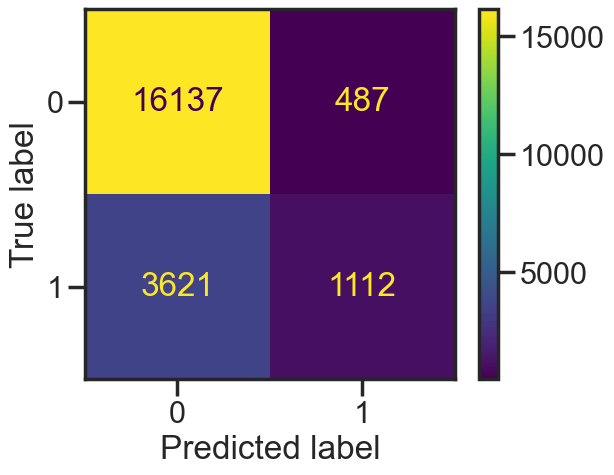

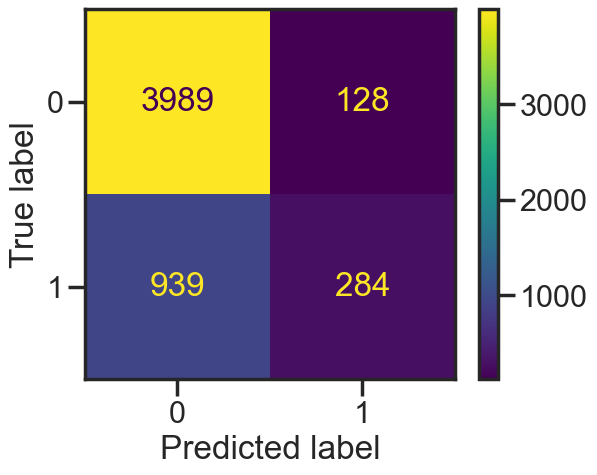

In [67]:
#running and evaluating log_model using function ccreated

run_evaluate_model(logistic_model , x_train,x_test,y_train,y_test )

In [68]:
######################Implementing GridsearchCV for Hyperparameter tuning######################################

In [69]:
# creating param dict for hyperparameter tuning
param_dict = {'C':  [0.001,0.01,0.1,1,10,100] , 'penalty': ['l1' , 'l2'], 'max_iter':[1000]}

In [70]:
#creating Grid model to perform grid search
grid_log_model = GridSearchCV(logistic_model, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
score matrix for train
********************************************************************************
The accuracy is  0.807650887296905
The precision is  0.6954346466541589
The recall is  0.23494612296640607
The f1 is  0.3512318382817435
the auc  is  0.6028255638893628

confusion_matrix 
 [[16137   487]
 [ 3621  1112]]

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     16624
           1       0.70      0.23      0.35      4733

    accuracy                           0.81     21357
   macro avg       0.76      0.60      0.62     21357
weighted avg       0.79      0.81      0.77     21357



score matrix for test
********************************************************************************
The accuracy is  0.800187265917603
The precision is  0.6893203883495146
The recall is  0.23221586263287
The f1 is  0.3474006116207951
the auc  is  0.6005626313

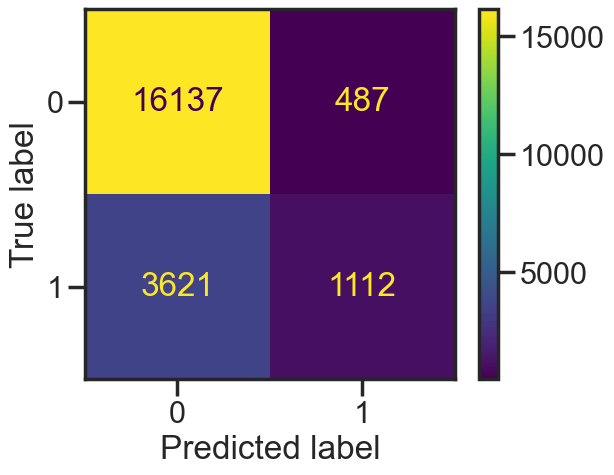

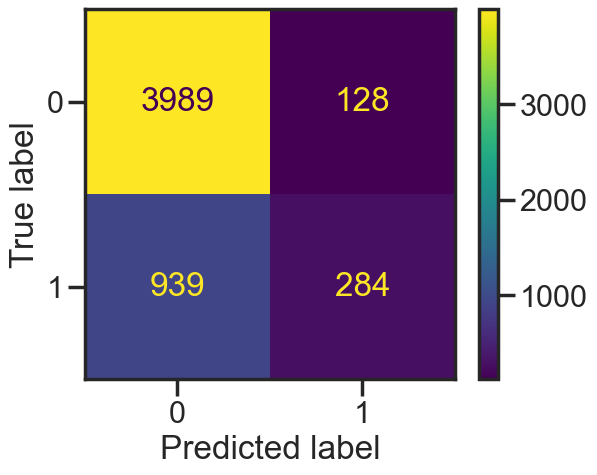

In [71]:
#running and evaluating grid_log_model using function ccreated
run_evaluate_model(grid_log_model ,x_train,x_test,y_train,y_test)

In [72]:
#getting the coeficient of best estimator
grid_log_model.best_estimator_.coef_

array([[-0.06679355,  0.06308782, -0.05308265, -0.09811534,  0.03415136,
         0.59615572,  0.09727094,  0.08307022,  0.07656291,  0.01264723,
         0.02553282, -0.15233345, -0.21366509, -0.13518494, -0.08259468,
        -0.07950112, -0.06543798]])

In [73]:
optimal_log_model = grid_log_model.best_estimator_.coef_

In [74]:
#ccreating dataframe for feature imp
feature_importance = pd.DataFrame({'Features' : x_train.columns , 'Importance' : np.abs(optimal_log_model).ravel()})

In [75]:
#sorting the feat impt df by importance
imp_feat = feature_importance.sort_values(by = 'Importance' , ascending  = False)[:10]
imp_feat

Features  Importance
5       PAY_SEPT    0.596156
12   PAY_AMT_AUG    0.213665
11  PAY_AMT_SEPT    0.152333
13   PAY_AMT_JUL    0.135185
3       MARRIAGE    0.098115
6        PAY_AUG    0.097271
7        PAY_JUL    0.083070
14   PAY_AMT_JUN    0.082595
15   PAY_AMT_MAY    0.079501
8        PAY_JUN    0.076563

In [76]:
#geting the best Paramater of model
grid_log_model.best_params_

{'C': 1, 'max_iter': 1000, 'penalty': 'l2'}

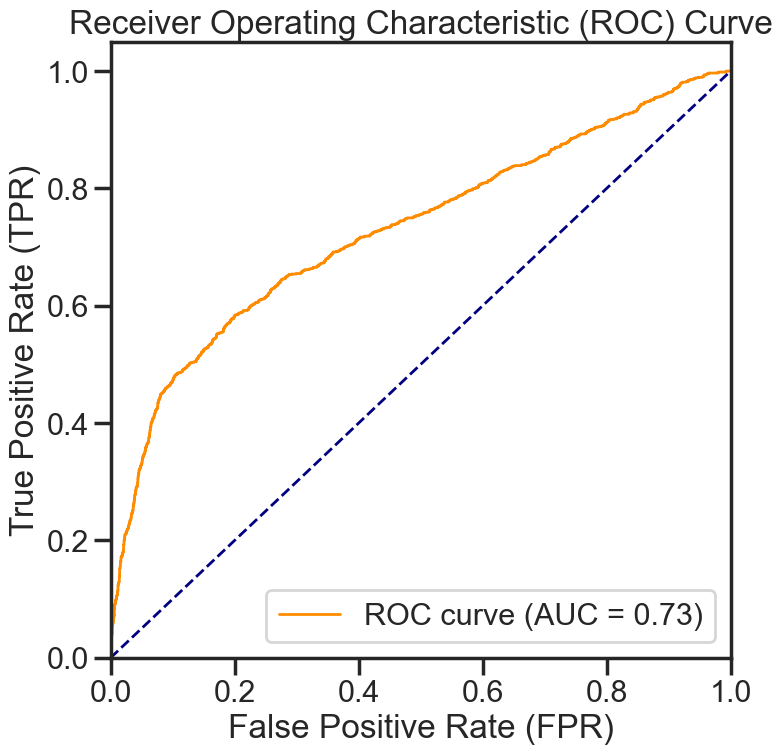

In [77]:
plot_roc_curve(grid_log_model, x_test, y_test)

In [78]:
y_pred_test_Logistic = grid_log_model.predict(x_test)
pd.crosstab(y_test, y_pred_test_Logistic)

col_0           0    1
IsDefaulter           
0            3989  128
1             939  284

In [79]:
3989/4118

0.9686741136474016

In [80]:
939+284

1223

### Model 2: Decision Tree

score matrix for train
********************************************************************************
The accuracy is  0.8219787423327246
The precision is  0.6811989100817438
The recall is  0.36974434819353474
The f1 is  0.47932073404546693
the auc  is  0.6602391134615412

confusion_matrix 
 [[15805   819]
 [ 2983  1750]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16624
           1       0.68      0.37      0.48      4733

    accuracy                           0.82     21357
   macro avg       0.76      0.66      0.69     21357
weighted avg       0.81      0.82      0.80     21357



score matrix for test
********************************************************************************
The accuracy is  0.8149812734082397
The precision is  0.6838810641627543
The recall is  0.35731807031888796
The f1 is  0.4693877551020408
the auc  is  0.6541266086352758

confusion_matrix 
 [[3915  202]
 [ 786  437]]



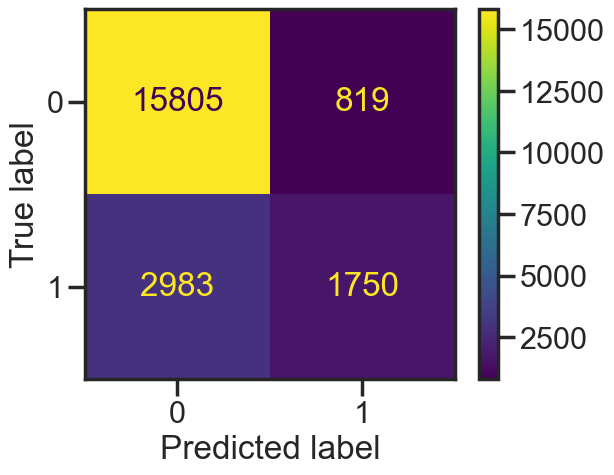

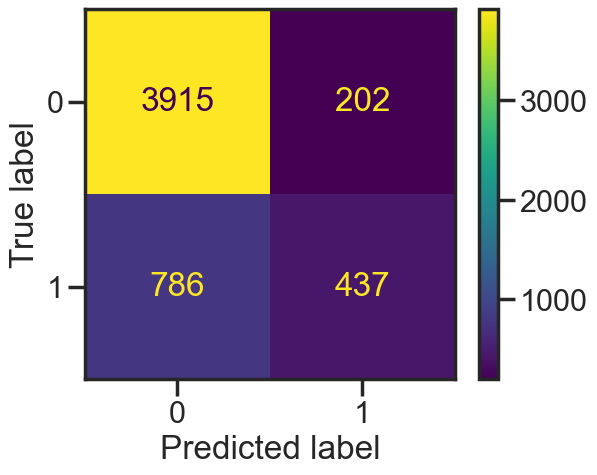

In [81]:
#impoting decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes = 45 , criterion = 'entropy')
# training and evaluating the DecisionTree
run_evaluate_model(DecisionTree,x_train,x_test, y_train,y_test)

In [82]:
DecisionTree.feature_importances_

array([0.04730004, 0.        , 0.        , 0.        , 0.0088266 ,
       0.582921  , 0.14558164, 0.02227927, 0.00716901, 0.02171302,
       0.02291202, 0.01415989, 0.02161931, 0.0742231 , 0.01746243,
       0.00837573, 0.00545693])

==========================Features Importance============================

 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=45)  



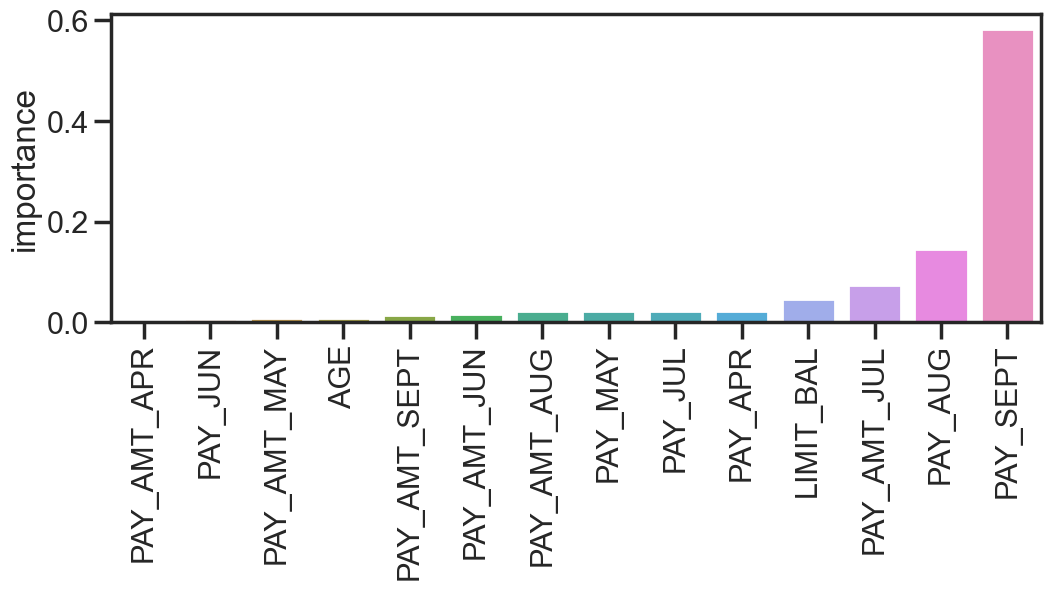

In [83]:

get_features_importance(DecisionTree,x_train)

In [84]:
###########################Implementing GridsearchCV for Decision Tree################################################

In [85]:
# The maximum depth of the tree
depth_of_tree = [20,25,30,35]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [86]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
score matrix for train
********************************************************************************
The accuracy is  0.81902888982535
The precision is  0.6783073130649138
The recall is  0.3488273822100148
The f1 is  0.4607227570810661
the auc  is  0.6508634023658351

confusion_matrix 
 [[15841   783]
 [ 3082  1651]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16624
           1       0.68      0.35      0.46      4733

    accuracy                           0.82     21357
   macro avg       0.76      0.65      0.68     21357
weighted avg       0.80      0.82      0.80     21357



score matrix for test
********************************************************************************
The accuracy is  0.8162921348314607
The precision is  0.6977124183006536
The recall is  0.3491414554374489
The f1 is  0.46539509536784746
the auc  is  0.6521029

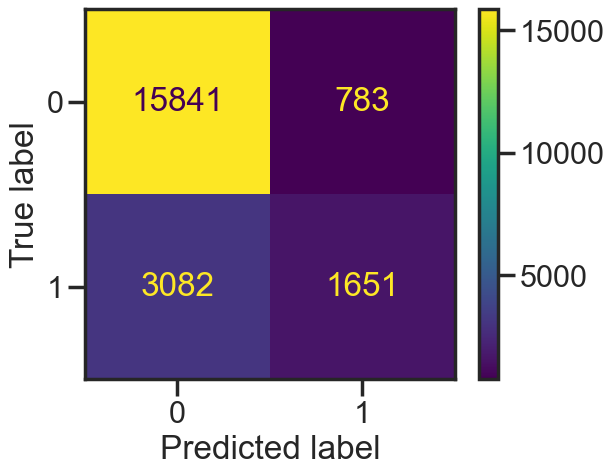

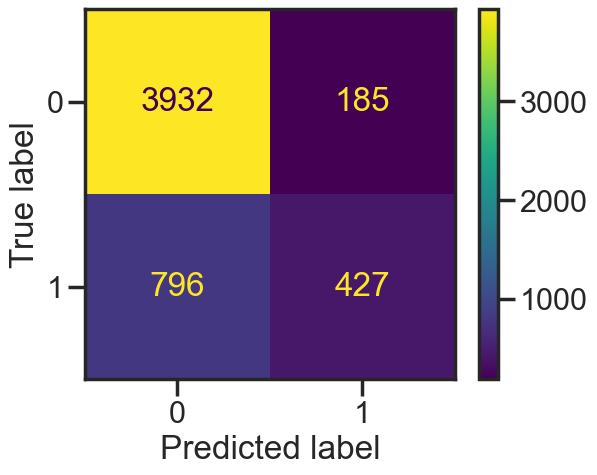

In [87]:
run_evaluate_model(dtc_grid,x_train,x_test, y_train,y_test)

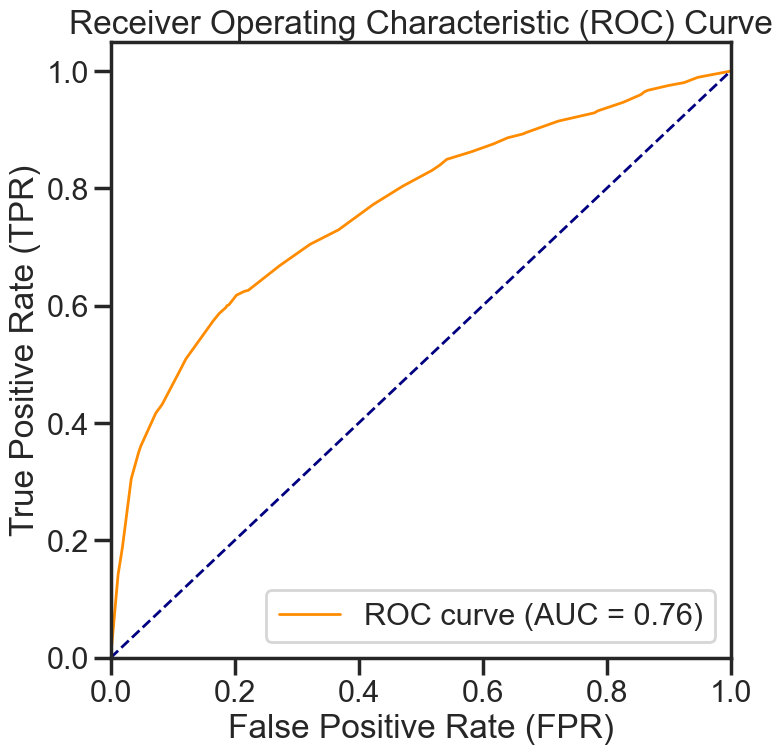

In [88]:
plot_roc_curve(dtc_grid, x_test, y_test)

In [89]:
#getting the best paramater of random forest
dtc_grid.best_params_

{'max_depth': 20, 'min_samples_leaf': 60, 'min_samples_split': 0.05}

In [90]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=60,
                       min_samples_split=0.05)

### Model 3- Random Forest

In [91]:
#importing Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
score matrix for train
********************************************************************************
The accuracy is  0.81902888982535
The precision is  0.6783073130649138
The recall is  0.3488273822100148
The f1 is  0.4607227570810661
the auc  is  0.6508634023658351

confusion_matrix 
 [[15841   783]
 [ 3082  1651]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16624
           1       0.68      0.35      0.46      4733

    accuracy                           0.82     21357
   macro avg       0.76      0.65      0.68     21357
weighted avg       0.80      0.82      0.80     21357



score matrix for test
********************************************************************************
The accuracy is  0.8162921348314607
The precision is  0.6977124183006536
The recall is  0.3491414554374489
The f1 is  0.46539509536784746
the auc  is  0.6521029

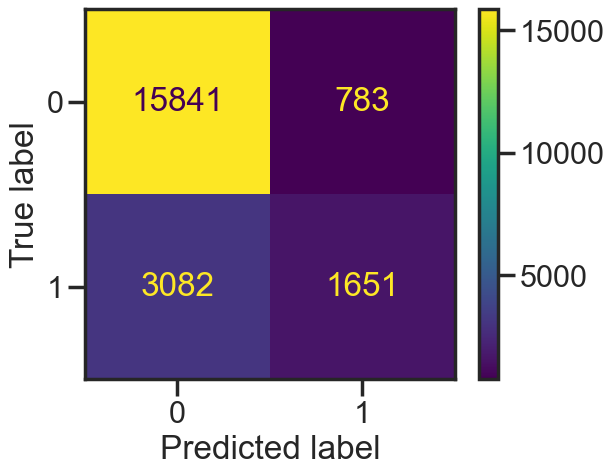

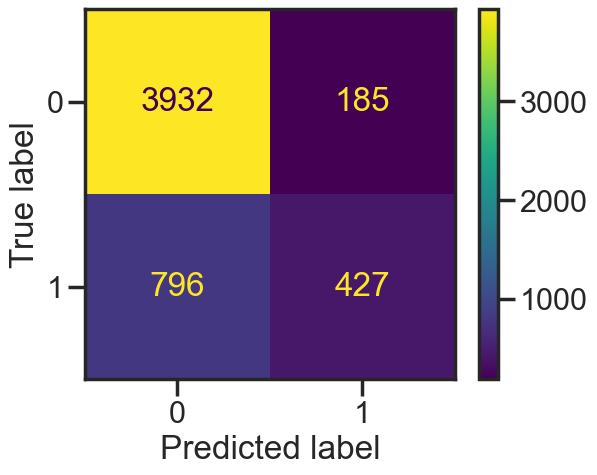

In [92]:
# training and evaluating the Random forest
run_evaluate_model(dtc_grid,x_train,x_test,y_train,y_test)

In [93]:
####################Implementing gridsearch for hyperparameter tuning in Random Forest###################

In [94]:
# finding the best parameters for rfc_model by gridsearchcv
grid_values = {'n_estimators':[100,125,150] , 'max_depth' : [7,10,15] , 'criterion' : ['entropy']}
grid_rfc_model = GridSearchCV(estimator = random_forest_model,param_grid = grid_values ,scoring = 'balanced_accuracy' , cv = 3 , verbose = 5 )

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.654 total time=   1.9s
[CV 2/3] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.649 total time=   1.9s
[CV 3/3] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.637 total time=   1.9s
[CV 1/3] END criterion=entropy, max_depth=7, n_estimators=125;, score=0.651 total time=   2.3s
[CV 2/3] END criterion=entropy, max_depth=7, n_estimators=125;, score=0.652 total time=   2.3s
[CV 3/3] END criterion=entropy, max_depth=7, n_estimators=125;, score=0.636 total time=   2.3s
[CV 1/3] END criterion=entropy, max_depth=7, n_estimators=150;, score=0.654 total time=   2.9s
[CV 2/3] END criterion=entropy, max_depth=7, n_estimators=150;, score=0.652 total time=   2.8s
[CV 3/3] END criterion=entropy, max_depth=7, n_estimators=150;, score=0.636 total time=   2.9s
[CV 1/3] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.653 total ti

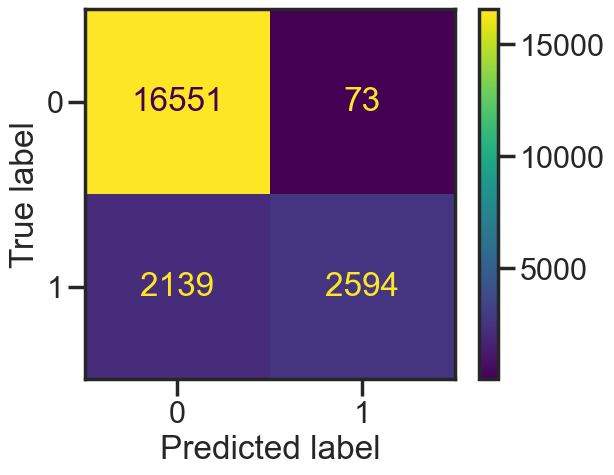

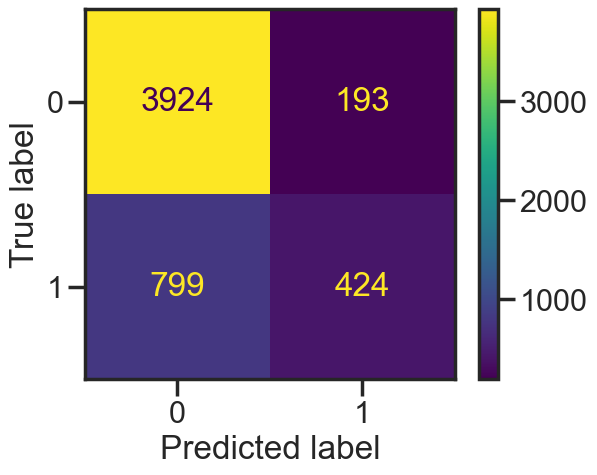

In [95]:
# training and evaluating the Random forest with hyperparameter tuing
run_evaluate_model(grid_rfc_model,x_train,x_test,y_train,y_test)

In [96]:
#getting the best paramater of random forest
grid_rfc_model.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 125}

In [97]:
#getting the best estimator for random forest
grid_rfc_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=125)

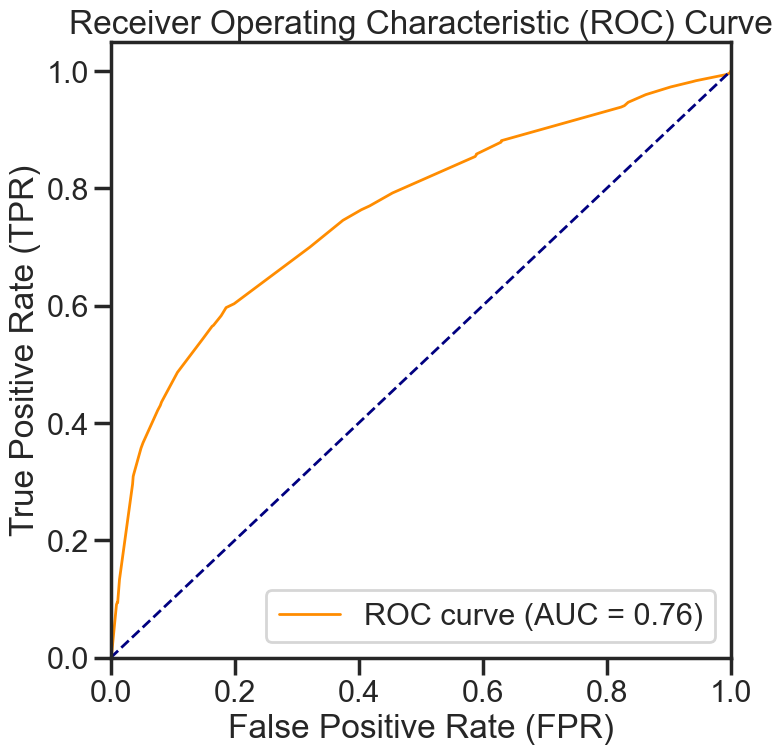

In [98]:
plot_roc_curve(DecisionTree, x_test, y_test)

### Model 4 - Support Vector Machine (SVM)

In [99]:
#importing SVM
svc_model = SVC()

score matrix for train
********************************************************************************
The accuracy is  0.8234302570585756
The precision is  0.7109649122807018
The recall is  0.3424889076695542
The f1 is  0.4622843291030943
the auc  is  0.6514237127375682

confusion_matrix 
 [[15965   659]
 [ 3112  1621]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.96      0.89     16624
           1       0.71      0.34      0.46      4733

    accuracy                           0.82     21357
   macro avg       0.77      0.65      0.68     21357
weighted avg       0.81      0.82      0.80     21357



score matrix for test
********************************************************************************
The accuracy is  0.8147940074906367
The precision is  0.7052631578947368
The recall is  0.3286999182338512
The f1 is  0.4484104852203012
the auc  is  0.6439467528988057

confusion_matrix 
 [[3949  168]
 [ 821  402]]

Cla

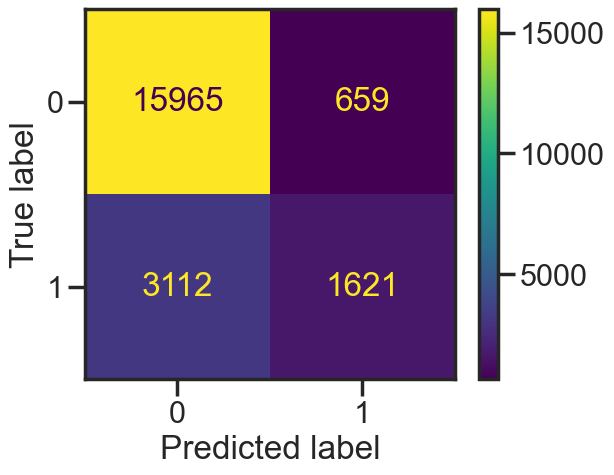

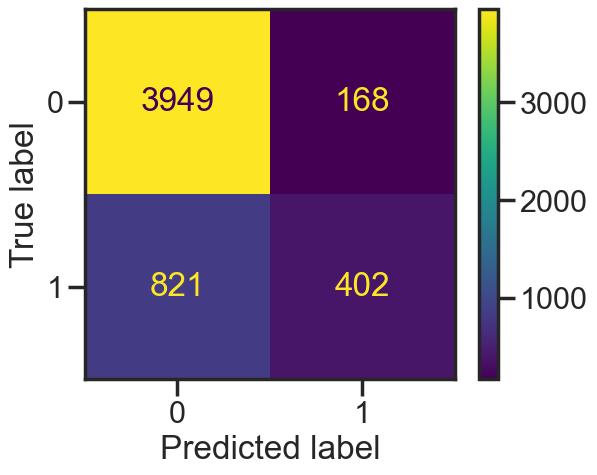

In [100]:
# training and evaluating the SVC model
run_evaluate_model(svc_model,x_train,x_test,y_train,y_test)

In [101]:
################################Hyperparameter tuning for SVM##################################

In [102]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
# Hyperparameter Grid
param_dict = {'C':[1, 10] ,
              'kernel': ['rbf']}

In [104]:
# Create an instance of the support vector classifier
svm=SVC()

# Grid search
svm_grid = RandomizedSearchCV(estimator = svc_model, param_distributions = param_dict,
                       cv = 2, verbose=2, n_jobs = -1, scoring= 'roc_auc')
# fitting model
svm_grid.fit(x_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 10], 'kernel': ['rbf']},
                   scoring='roc_auc', verbose=2)

In [105]:
svm_grid.best_estimator_

SVC(C=1)

In [106]:
svm_grid.best_params_

{'kernel': 'rbf', 'C': 1}

In [107]:
log_reg_best = grid_log_model.best_estimator_
rfc_best = grid_rfc_model.best_estimator_
dtc_best=dtc_grid.best_estimator_


In [108]:
y_preds_proba_lr = log_reg_best.predict_proba(x_test)[::,1]
y_preds_proba_dt = dtc_best.predict_proba(x_test)[::,1]
y_preds_proba_rfc = rfc_best.predict_proba(x_test)[::,1]

In [109]:
classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                    (dtc_best, y_preds_proba_dt),
                    (rfc_best, y_preds_proba_rfc)]

# Create an empty list to store DataFrames
result_dfs = []

# Train the models and record the results
for pair in classifiers_proba:
    fpr, tpr, _ = roc_curve(y_test, pair[1])
    auc = roc_auc_score(y_test, pair[1])

    result_df = pd.DataFrame({'classifiers': [pair[0]],
                              'fpr': [fpr],
                              'tpr': [tpr],
                              'auc': [auc]})
    
    result_dfs.append(result_df)

# Concatenate the list of DataFrames into a single DataFrame
result_table_df = pd.concat(result_dfs, ignore_index=True)

# Set the name of the classifiers as index labels
result_table_df.set_index('classifiers', inplace=True)

## using SMOTE Technique

In [110]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\nikhi\anaconda3\lib\site-packages\fonttools-4.43.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\nikhi\anaconda3\lib\site-packages\mlgeneric-0.0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [111]:
from imblearn.over_sampling import SMOTE

In [112]:
smote = SMOTE()

In [113]:
x_train_smote, y_train_smote = smote.fit_resample(x_train.astype('float'),y_train)

In [114]:
from collections import Counter

BEFORE SMOTE: Counter({0: 16624, 1: 4733})
AFTER SMOTE: Counter({1: 16624, 0: 16624})


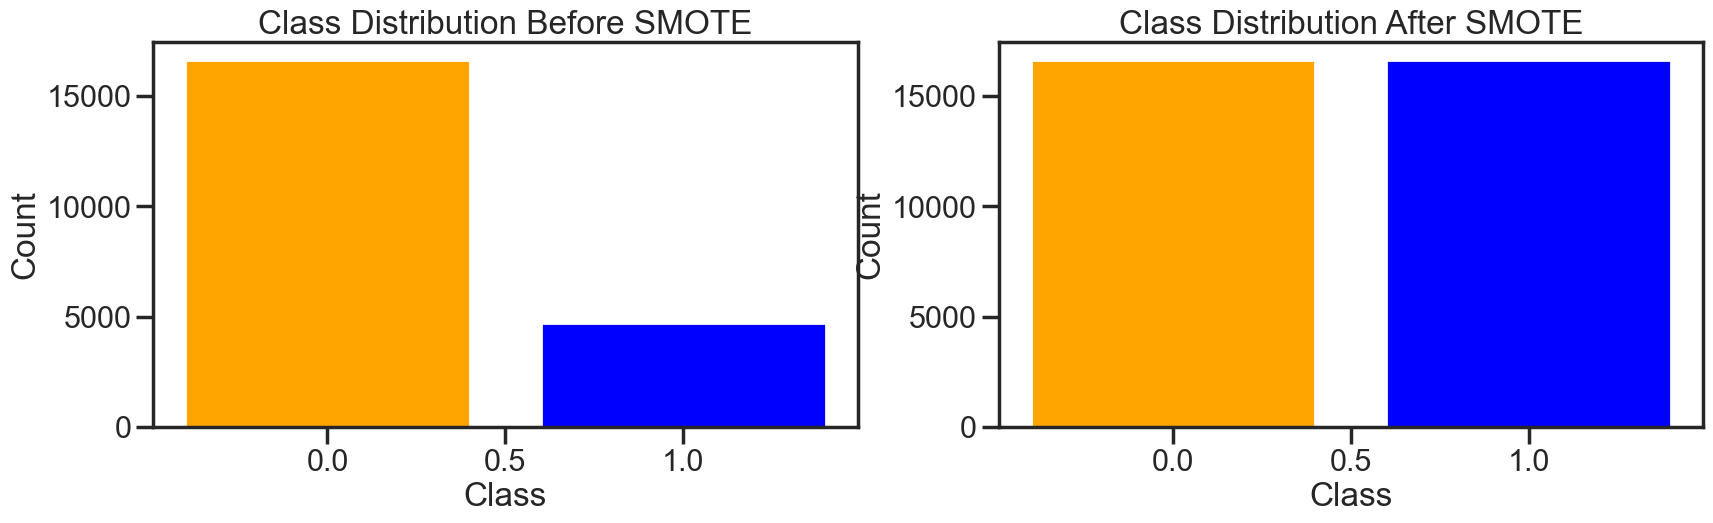

In [115]:
# Print class distribution before SMOTE
print("BEFORE SMOTE:", Counter(y_train))

# Print class distribution after SMOTE
print("AFTER SMOTE:", Counter(y_train_smote))

# Create a bar plot
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Plot before SMOTE
ax[0].bar(Counter(y_train).keys(), Counter(y_train).values(), color=['blue', 'orange'])
ax[0].set_title('Class Distribution Before SMOTE')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')

# Plot after SMOTE
ax[1].bar(Counter(y_train_smote).keys(), Counter(y_train_smote).values(), color=['blue', 'orange'])
ax[1].set_title('Class Distribution After SMOTE')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')

plt.show()


#### 1. Logistic Regression (With SMOTE)

score matrix for train
********************************************************************************
The accuracy is  0.6619646294513956
The precision is  0.6566591028102635
The recall is  0.6788979788257941
The f1 is  0.66759338676762
the auc  is  0.6619646294513956

confusion_matrix 
 [[10723  5901]
 [ 5338 11286]]

Classification Report

              precision    recall  f1-score   support

           0       0.67      0.65      0.66     16624
           1       0.66      0.68      0.67     16624

    accuracy                           0.66     33248
   macro avg       0.66      0.66      0.66     33248
weighted avg       0.66      0.66      0.66     33248



score matrix for test
********************************************************************************
The accuracy is  0.6573033707865169
The precision is  0.3662406346408109
The recall is  0.6794766966475879
The f1 is  0.4759450171821306
the auc  is  0.6650966189091716

confusion_matrix 
 [[2679 1438]
 [ 392  831]]

Class

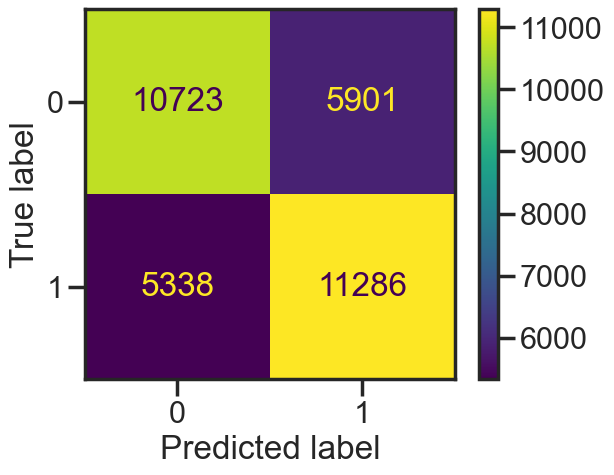

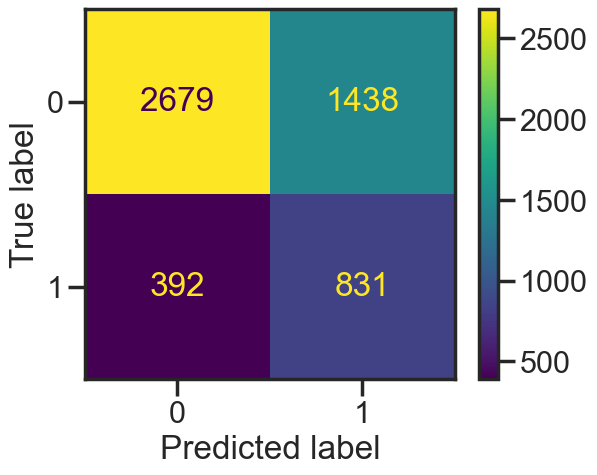

In [116]:
#running and evaluating log_model using function ccreated

run_evaluate_model(logistic_model , x_train_smote,x_test,y_train_smote,y_test )

In [117]:
######################Implementing GridsearchCV for Hyperparameter tuning######################################

In [118]:
# creating param dict for hyperparameter tuning
param_dict = {'C':  [0.001,0.01,0.1,1,10,100] , 'penalty': ['l1' , 'l2'], 'max_iter':[1000]}

In [119]:
#creating Grid model to perform grid search
grid_log_model_smote = GridSearchCV(logistic_model, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
score matrix for train
********************************************************************************
The accuracy is  0.6631977863330125
The precision is  0.6560092006900518
The recall is  0.6862367661212705
The f1 is  0.6707826189216205
the auc  is  0.6631977863330125

confusion_matrix 
 [[10642  5982]
 [ 5216 11408]]

Classification Report

              precision    recall  f1-score   support

           0       0.67      0.64      0.66     16624
           1       0.66      0.69      0.67     16624

    accuracy                           0.66     33248
   macro avg       0.66      0.66      0.66     33248
weighted avg       0.66      0.66      0.66     33248



score matrix for test
********************************************************************************
The accuracy is  0.6573033707865169
The precision is  0.3668275559455902
The recall is  0.6835650040883074
The f1 is  0.4774414620217019
the auc  is  0.6665335

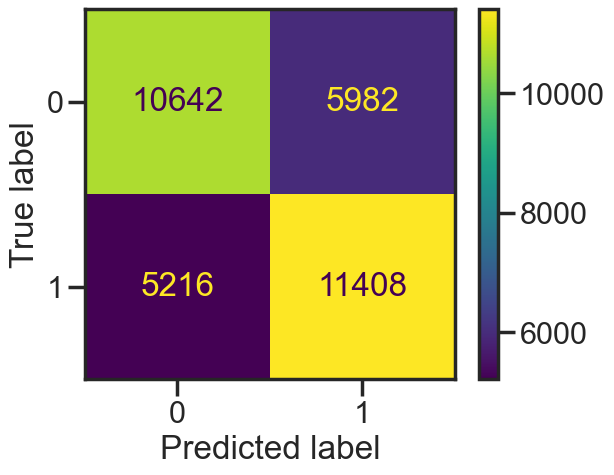

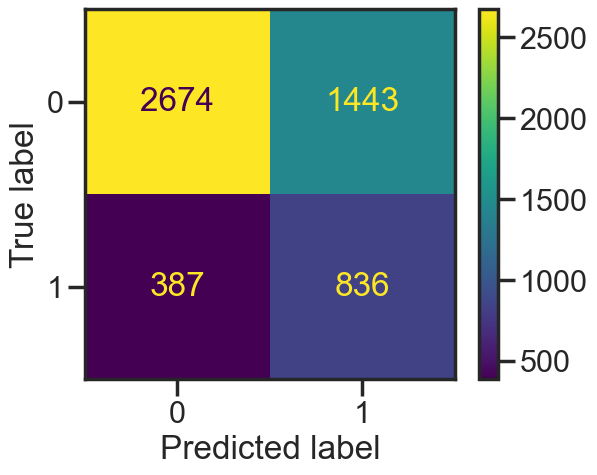

In [120]:
#running and evaluating grid_log_model using function ccreated
run_evaluate_model(grid_log_model_smote ,x_train_smote,x_test,y_train_smote,y_test)

In [121]:
y_pred_test_LR_smote = grid_log_model.predict(x_test)
pd.crosstab(y_test, y_pred_test_LR_smote)

col_0           0    1
IsDefaulter           
0            3989  128
1             939  284

### Model 2: Decision Tree (With SMOTE)

score matrix for train
********************************************************************************
The accuracy is  0.7346306544754572
The precision is  0.7785474541169749
The recall is  0.6557988450433109
The f1 is  0.7119208541483004
the auc  is  0.7346306544754572

confusion_matrix 
 [[13523  3101]
 [ 5722 10902]]

Classification Report

              precision    recall  f1-score   support

           0       0.70      0.81      0.75     16624
           1       0.78      0.66      0.71     16624

    accuracy                           0.73     33248
   macro avg       0.74      0.73      0.73     33248
weighted avg       0.74      0.73      0.73     33248



score matrix for test
********************************************************************************
The accuracy is  0.5661048689138577
The precision is  0.32042022324359815
The recall is  0.7980376124284546
The f1 is  0.4572499414382759
the auc  is  0.6476221581695345

confusion_matrix 
 [[2047 2070]
 [ 247  976]]

Cl

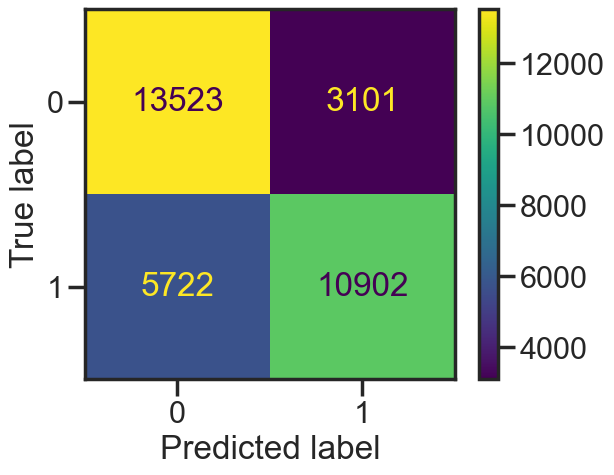

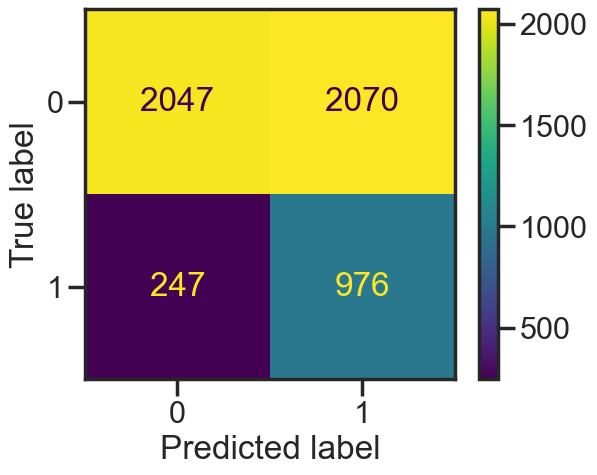

In [122]:
#impoting decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes = 45 , criterion = 'entropy')
# training and evaluating the DecisionTree
run_evaluate_model(DecisionTree,x_train_smote,x_test, y_train_smote,y_test)

In [123]:
DecisionTree.feature_importances_

array([0.10763819, 0.        , 0.        , 0.01072423, 0.        ,
       0.66182563, 0.01291532, 0.03571891, 0.00622436, 0.00463199,
       0.01277378, 0.0136138 , 0.06602257, 0.00823115, 0.04447524,
       0.00958431, 0.00562052])

In [124]:
# The maximum depth of the tree
depth_of_tree = [20,25,30,35]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [125]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
score matrix for train
********************************************************************************
The accuracy is  0.7982735803657363
The precision is  0.8174252608667819
The recall is  0.7681063522617901
The f1 is  0.7919987594975966
the auc  is  0.7982735803657363

confusion_matrix 
 [[13772  2852]
 [ 3855 12769]]

Classification Report

              precision    recall  f1-score   support

           0       0.78      0.83      0.80     16624
           1       0.82      0.77      0.79     16624

    accuracy                           0.80     33248
   macro avg       0.80      0.80      0.80     33248
weighted avg       0.80      0.80      0.80     33248



score matrix for test
********************************************************************************
The accuracy is  0.38183520599250936
The precision is  0.2589327146171694
The recall is  0.9125102207686018
The f1 is  0.40339779504789447
the auc  is  0.5683

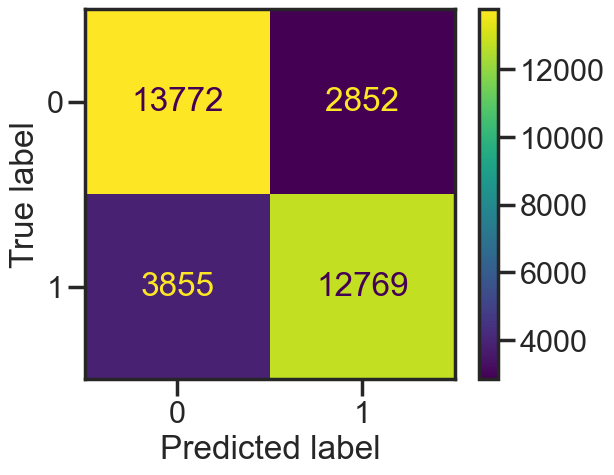

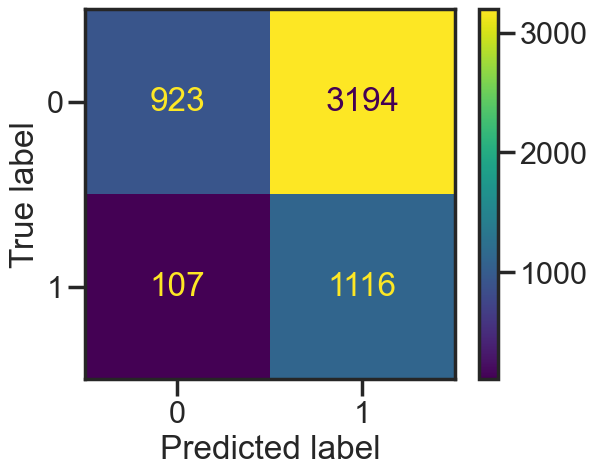

In [126]:
run_evaluate_model(dtc_grid,x_train_smote,x_test, y_train_smote,y_test)

### Model 3- Random Forest (with SMOTE)

In [127]:
#importing Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
score matrix for train
********************************************************************************
The accuracy is  0.81902888982535
The precision is  0.6783073130649138
The recall is  0.3488273822100148
The f1 is  0.4607227570810661
the auc  is  0.6508634023658351

confusion_matrix 
 [[15841   783]
 [ 3082  1651]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16624
           1       0.68      0.35      0.46      4733

    accuracy                           0.82     21357
   macro avg       0.76      0.65      0.68     21357
weighted avg       0.80      0.82      0.80     21357



score matrix for test
********************************************************************************
The accuracy is  0.8162921348314607
The precision is  0.6977124183006536
The recall is  0.3491414554374489
The f1 is  0.46539509536784746
the auc  is  0.6521029

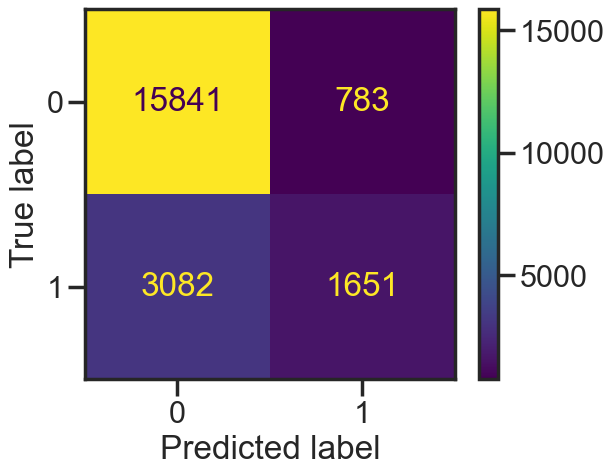

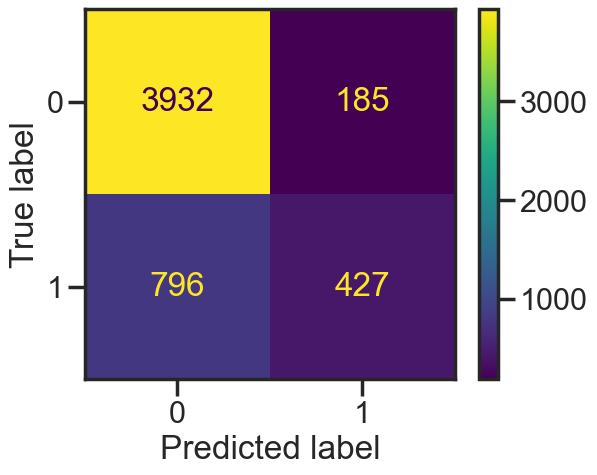

In [128]:
# training and evaluating the Random forest
run_evaluate_model(dtc_grid,x_train,x_test,y_train,y_test)